#**Reading the data**

In [313]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.shape

(1235, 29)

#**Understanding the data**

In general the dataset contains 29 columns: 12 columns with numerical data and 17 with categorical. The describe method shows that there is no Null values. However missing values in the dataset are filled in with string "none" or "None".![Screenshot 2023-12-10 232643.png](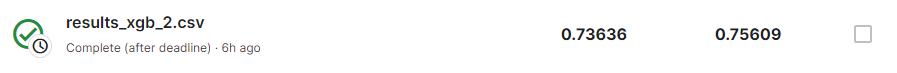![Screenshot 2023-12-10 232710.png](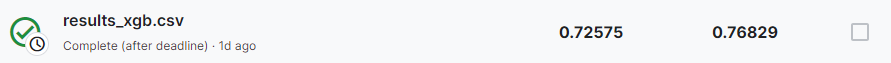![Screenshot 2023-12-10 232643.png](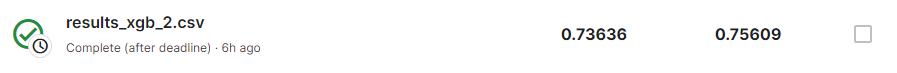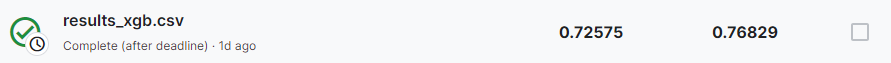)))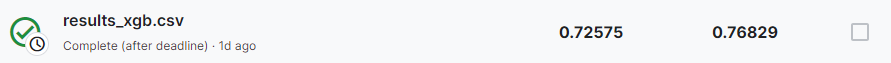

In [314]:
print(train_data.head(10))
print(train_data.info()) # shows that there is no Null values
num_data_desc = train_data.describe()
print(num_data_desc)

   id surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0   0     yes  adult           530001         38.1  132.0              24.0   
1   1     yes  adult           533836         37.5   88.0              12.0   
2   2     yes  adult           529812         38.3  120.0              28.0   
3   3     yes  adult          5262541         37.1   72.0              30.0   
4   4      no  adult          5299629         38.0   52.0              48.0   
5   5      no  adult           529642         38.1   56.0              32.0   
6   6     yes  adult           534787         38.3   36.0              16.0   
7   7      no  adult           529461         39.2  114.0              24.0   
8   8      no  adult           528742         37.4   48.0              12.0   
9   9     yes  adult           529640         38.3  129.0              48.0   

  temp_of_extremities peripheral_pulse mucous_membrane  ...  \
0                cool          reduced   dark_cyanotic  ...   
1   

# **Description and understanding of numerical data**
## **Description of given features and their normal values in real life**
**Temperature**

Normal temperature for horse: 37.5-38.5;

**Pulse**

Normal adult horses have a heart rate of 28 to 40 beats per minute. Newborn foals' heart rates range from 80 to 120, older foals from 60 to 80, and yearlings from 40 to 60 beats per minute.

**Respiration rate**

The normal respiration rate for a horse is 8 to 16 breaths per minute. Respirations triple when a horse walks. If a horse exercises extensively in high temperatures, respiration rate may increase to 120 breaths per minute.

**Nasogastric reflux PH**

The greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine. A normal horse usually has gastric reflux of less than 2 L of fluid.

**Packed cell volume**

The # of red cells by volume in the blood. Normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.

**Total protein**

Normal values lie in the 6-7.5 (g/dL) range - the higher the value the greater the dehydration.

**Abdomcentesis total protein**

The higher the level of protein the more likely it is to have a compromised gut. Values are in g/dL. Normal values for abdominocentesis include a total protein < 2.5 g/dL.

**Lesion 1/2/3**

A region in an organ or tissue which has suffered damage through injury or disease, such as a wound, ulcer, abscess, or tumour.
- First number is site of lesion:

1 = gastric;
2 = sm intestine;
3 = lg colon;
4 = lg colon and cecum;
5 = cecum;
6 = transverse colon;
7 = retum/descending colon;
8 = uterus;
9 = bladder;
11 = all intestinal sites;
00 = none;
- second number is type

1 = simple;
2 = strangulation;
3 = inflammation;
4 = other
- third number is subtype

1 = mechanical;
2 = paralytic;
0 = n/a
- fourth number is specific code

1 = obturation;
2 = intrinsic;
3 = extrinsic;
4 = adynamic;
5 = volvulus/torsion;
6 = intussuption;
7 = thromboembolic;
8 = hernia;
9 = lipoma/slenic incarceration;
10 = displacement;
0 = n/a



##**Visualization of numerical data**

With green rectangle we highlight the range of normal values of this indicator in a healthy individual for better understanding of given distribution.

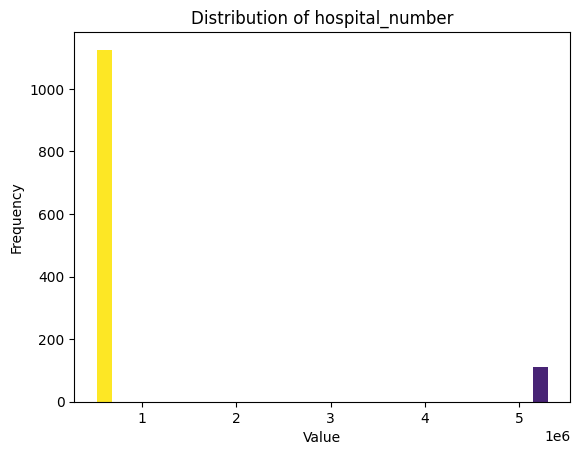

count    1.235000e+03
mean     9.545004e+05
std      1.356403e+06
min      5.213990e+05
25%      5.288000e+05
50%      5.297770e+05
75%      5.341450e+05
max      5.305129e+06
Name: hospital_number, dtype: float64


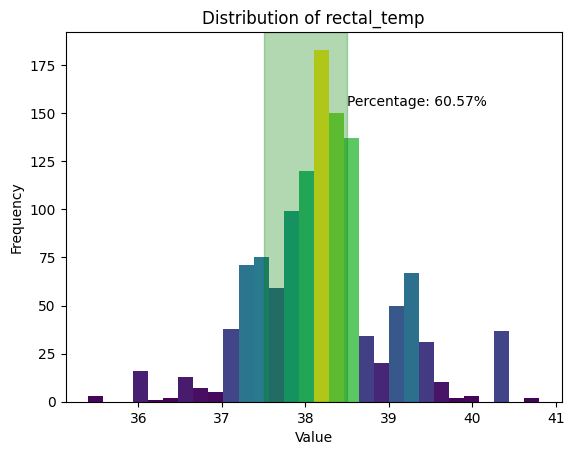

count    1235.000000
mean       38.202186
std         0.788668
min        35.400000
25%        37.800000
50%        38.200000
75%        38.600000
max        40.800000
Name: rectal_temp, dtype: float64


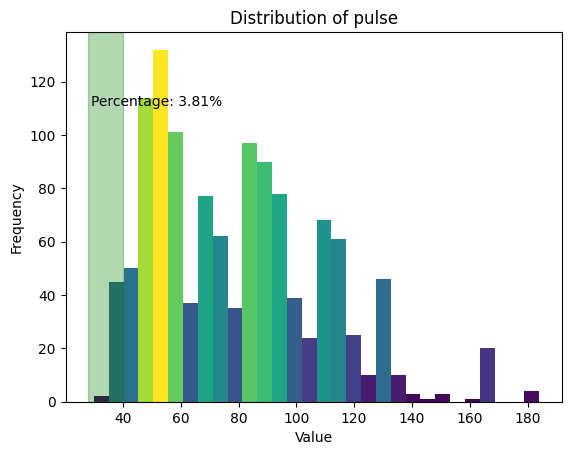

count    1235.000000
mean       79.574089
std        29.108638
min        30.000000
25%        53.000000
50%        76.000000
75%       100.000000
max       184.000000
Name: pulse, dtype: float64


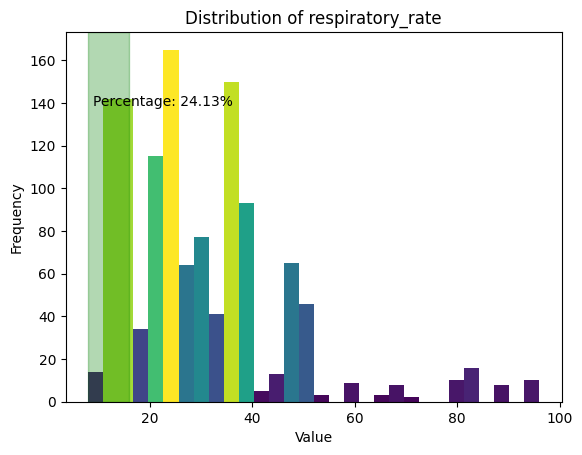

count    1235.000000
mean       30.054251
std        16.452066
min         8.000000
25%        18.000000
50%        28.000000
75%        36.000000
max        96.000000
Name: respiratory_rate, dtype: float64


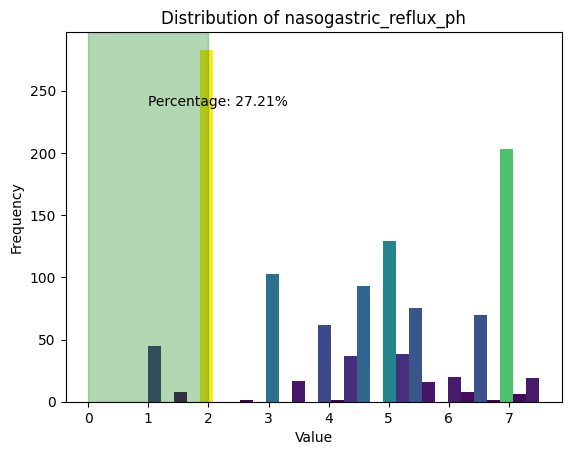

count    1235.000000
mean        4.382591
std         1.937357
min         1.000000
25%         2.000000
50%         4.500000
75%         6.000000
max         7.500000
Name: nasogastric_reflux_ph, dtype: float64


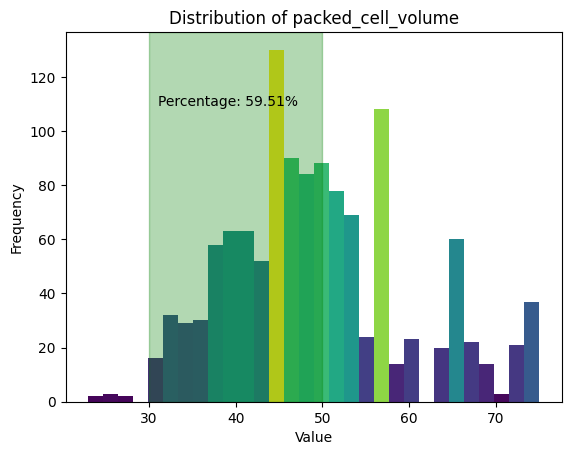

count    1235.000000
mean       49.602429
std        10.535800
min        23.000000
25%        43.000000
50%        48.000000
75%        57.000000
max        75.000000
Name: packed_cell_volume, dtype: float64


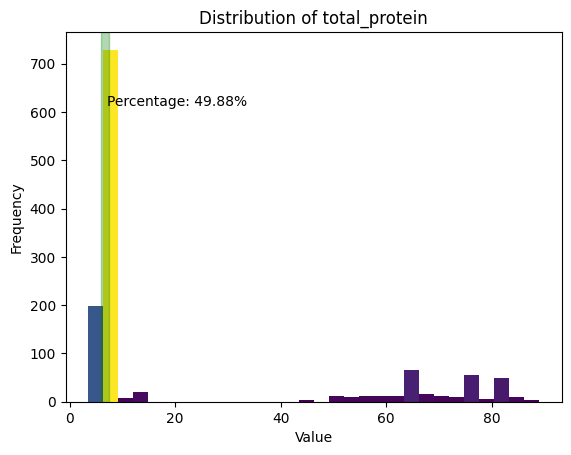

count    1235.000000
mean       21.388016
std        26.676453
min         3.500000
25%         6.600000
50%         7.500000
75%         9.100000
max        89.000000
Name: total_protein, dtype: float64


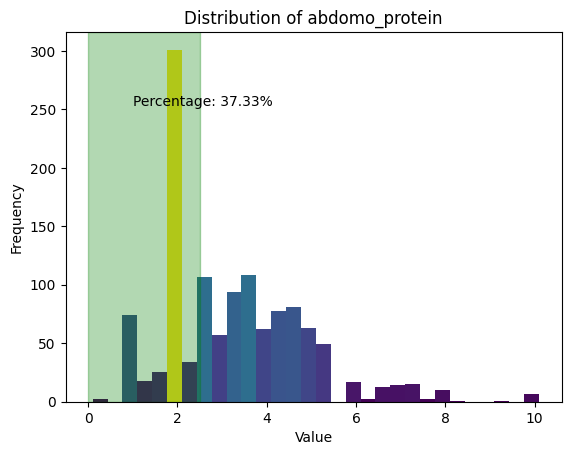

count    1235.000000
mean        3.290931
std         1.589195
min         0.100000
25%         2.000000
50%         3.000000
75%         4.300000
max        10.100000
Name: abdomo_protein, dtype: float64


In [315]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

norm_limits = {'rectal_temp':[37.5, 38.5], 'pulse':[28, 40], 'respiratory_rate':[8, 16], 'nasogastric_reflux_ph': [0, 2], 'packed_cell_volume': [30, 50], 'total_protein': [6, 7.5], 'abdomo_protein': [0, 2.5]}
num_data_desc_repr = num_data_desc.drop(columns = ['id', 'lesion_1', 'lesion_2', 'lesion_3'])
for col in num_data_desc_repr:
    data = train_data[col]

    # Partly taken from https://matplotlib.org/stable/gallery/statistics/hist.html
    # N is the count in each bin, bins is the lower-limit of the bin
    N, bins, patches = plt.hist(data, bins=30)
    # We'll color code by height, but you could use any scalar
    fracs = N / N.max()
    # we need to normalize the data to 0..1 for the full range of the colormap
    norm = colors.Normalize(fracs.min(), fracs.max())
    # Now, we'll loop through our objects and set the color of each accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)


    # representing of clinical norm in comparison with the actual distribution
    if col in norm_limits.keys():
        limits = norm_limits[col]
        lower_limit, upper_limit = limits[0], limits[1]
        plt.axvspan(lower_limit, upper_limit, color='green', alpha=0.3, label='Normal Range')
        count_within_limits = np.sum((data >= lower_limit) & (data <= upper_limit))
        plt.annotate(f'Percentage: {round((count_within_limits/data.shape[0])*100,2)}%', xy=(lower_limit + 1, plt.ylim()[1] * 0.8), color='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    print(num_data_desc[col])

There are some questions about the attributes "lesion_1", "lesion_2", and "lesion_3". They contain the information about the surgical lesions that a horse had presented in the sequence of number. Each number represent some detail about the lesion. Unfortunately instead of integers the attributes were written in the string format, which make them hard to use as some information could be lost because of the data format. For instance, in the documentation we can see that '00' in the beginning of the sequence means that there is no information about the site of the lesion. Since integer representation loses '00' in the beginning in some cases with few numbers we can not say presisely whether the 2 first values were missed or not. There are also troubles due to unconsistency with the number of integers in the sequence as sometimes we have 4 numbers, sometimes 5 and there is no consistent way of how to extract the needed information from the data (e.g., about the difficulty of the lesion). Therefore, we cleaned and corrected some data manually. But we do not deny the option to exclude these features altogether in the future.

In [316]:
first_id = test_data['id'].loc[0]
ids = test_data['id']
print(first_id)
print(train_data.shape)

train_data = pd.concat([train_data, test_data], ignore_index=True)
print(test_data.shape)

1235
(1235, 29)
(824, 28)


In [317]:
# here we manualy handling the lesion_1 data
columns = ['lesion_1', 'lesion_2', 'lesion_3']
new_columns = ['id', 'lesion_site', 'type', 'subtype', 'code']
exceptions = ['11124', '11300', '11400', '21110', '31110', '41110']
exp_1 = ['gastric', 'sm intestine', 'lg colon', 'lg colon and cecum', 'cecum', 'transverse colon', 'retum/descending colon', 'uterus', 'bladder']
count = 0
lesions = {}
for c in columns:
    new_dataframe = pd.DataFrame(columns=new_columns)
    values = train_data[c].astype(str)
    for id, v in zip(train_data['id'], values):
            # handling exceptions
            if v in exceptions:
                if v in ['11124', '11300', '11400']:
                    count += 1
                    row = ['11'] + [*v[2:]]
                    new_dataframe = pd.concat([pd.DataFrame([[id]+row], columns=new_dataframe.columns), new_dataframe], ignore_index=True)
                else:
                    count += 1
                    row = [*v[:-2]] + ['10']
                    new_dataframe = pd.concat([pd.DataFrame([[id]+row], columns=new_dataframe.columns), new_dataframe], ignore_index=True)
            else:
                try:
                    if v != '0':
                        count += 1
                        new_dataframe = pd.concat([pd.DataFrame([[id]+[*v]], columns=new_dataframe.columns), new_dataframe], ignore_index=True)
                    else:
                        new_dataframe = pd.concat([pd.DataFrame([[id]+['0']*4], columns=new_dataframe.columns), new_dataframe], ignore_index=True)
                except Exception:
                    new_dataframe = pd.concat([pd.DataFrame([[id]+['0']*4], columns=new_dataframe.columns), new_dataframe], ignore_index=True)
                    continue
    print(count)
    count = 0
    print(new_dataframe)
    lesions[c] = new_dataframe



1906
        id lesion_site type subtype code
0     2058           2    2       0    5
1     2057           3    1       1    1
2     2056           2    2       0    5
3     2055           2    2       0    9
4     2054           3    2       0    5
...    ...         ...  ...     ...  ...
2054     4           0    0       0    0
2055     3           2    2       0    8
2056     2           5    1       2    4
2057     1           2    2       0    8
2058     0           2    2       0    9

[2059 rows x 5 columns]
12
        id lesion_site type subtype code
0     2058           0    0       0    0
1     2057           0    0       0    0
2     2056           0    0       0    0
3     2055           0    0       0    0
4     2054           0    0       0    0
...    ...         ...  ...     ...  ...
2054     4           0    0       0    0
2055     3           0    0       0    0
2056     2           0    0       0    0
2057     1           0    0       0    0
2058     0           0  

Further we can only take into account lesion 1, because there is almost no additional information in lesion_2 and lesion_3 column.

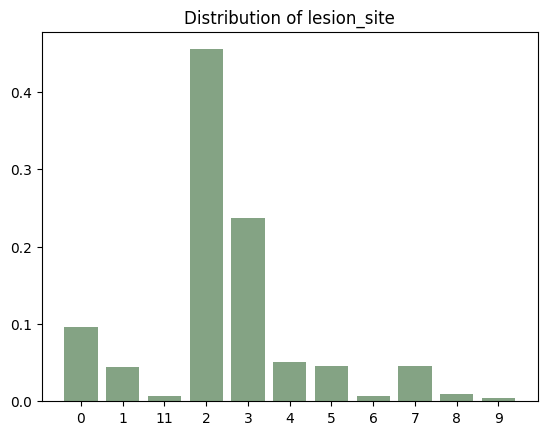

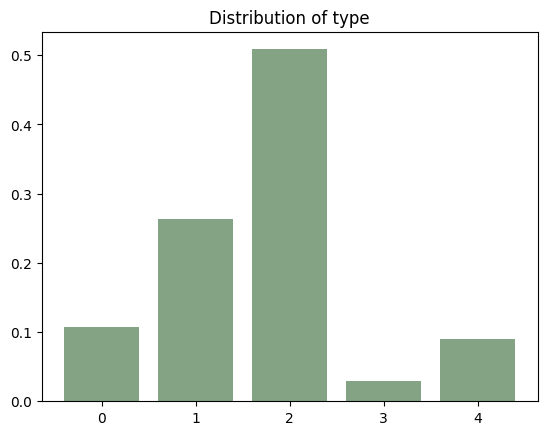

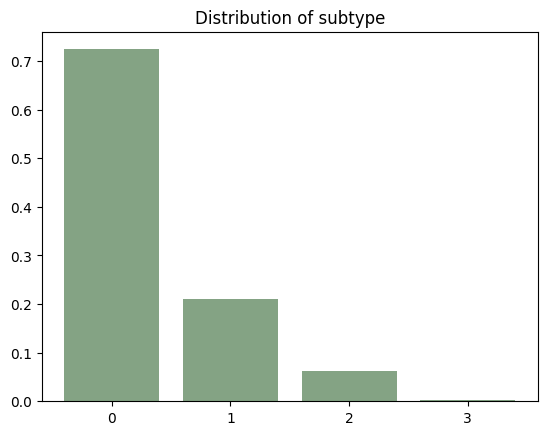

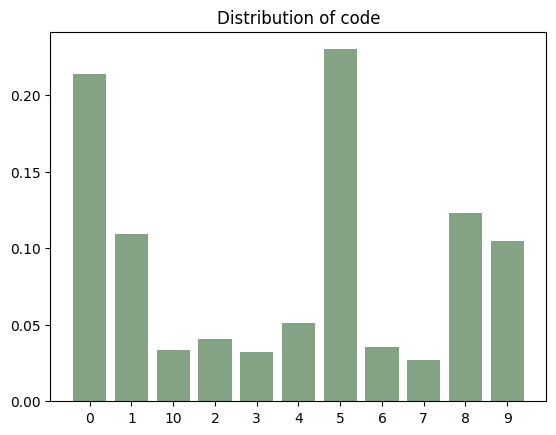

In [318]:
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         )

for col in lesions['lesion_1']:
    if col != 'id':
        # тут відображаються тепер тільки дані з трейн сету
        counts = lesions['lesion_1'][col].loc[lesions['lesion_1']['id'] < first_id].value_counts().sort_index()
        counts = counts/sum(counts)
        fig, ax = plt.subplots()
        ax.bar(np.unique(lesions['lesion_1'][col]), counts, color=color)
        ax.set_title(f'Distribution of {col}')
        plt.show()


On the one hand, the lesion column gives us information about the horse's previous surgeries and this can be important for predicting its ability to survive. However, we will get too many features when converting this date categorical, so we will try to include only the information about the site of lesion_1 when preprocessing the date.

In [319]:
lesion_site = (lesions['lesion_1']['lesion_site'][::-1]).reset_index()['lesion_site']
train_data['lesion_1'] = lesion_site

##**Visualization of categorical data**

       surgery    age temp_of_extremities peripheral_pulse mucous_membrane  \
count     2059   2059                2059             2059            2059   
unique       2      2                   5                5               7   
top        yes  adult                cool          reduced   pale_cyanotic   
freq      1476   1942                1172             1202             462   

       capillary_refill_time       pain peristalsis abdominal_distention  \
count                   2059       2059        2059                 2059   
unique                     4          8           6                    5   
top               less_3_sec  depressed  hypomotile             moderate   
freq                    1358        739        1111                  872   

       nasogastric_tube nasogastric_reflux rectal_exam_feces        abdomen  \
count              2059               2059              2059           2059   
unique                4                  5                 6          

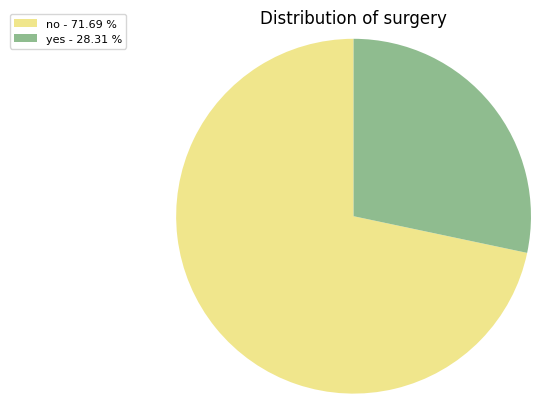

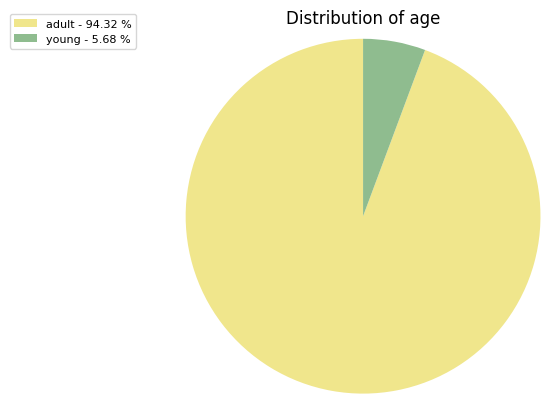

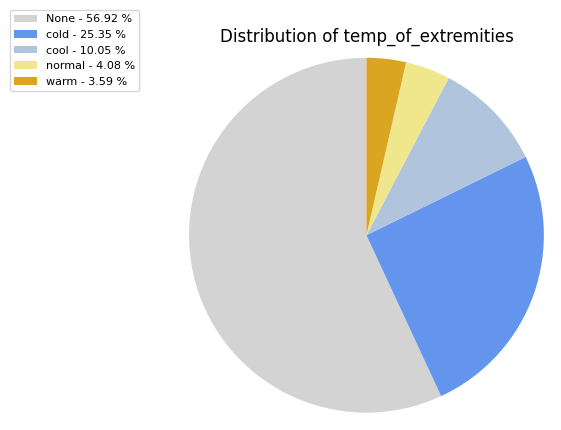

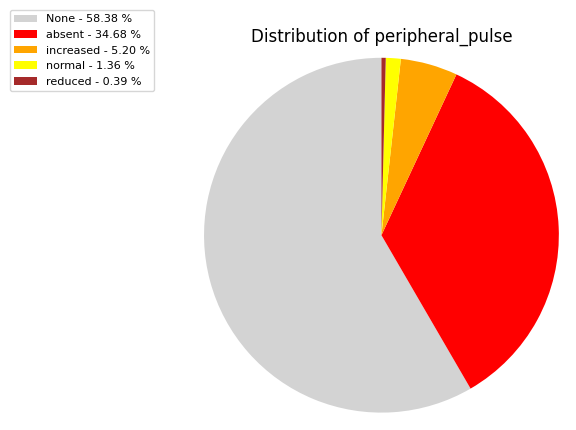

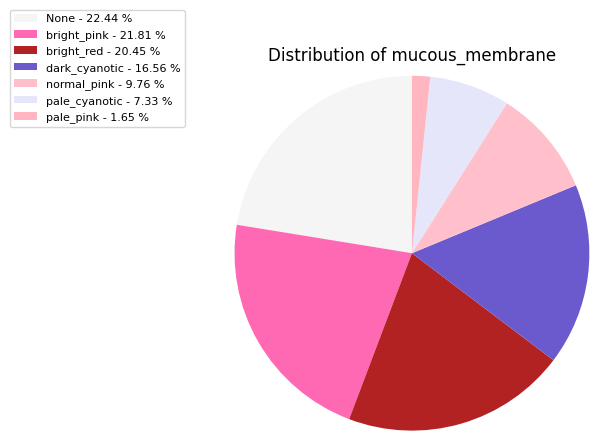

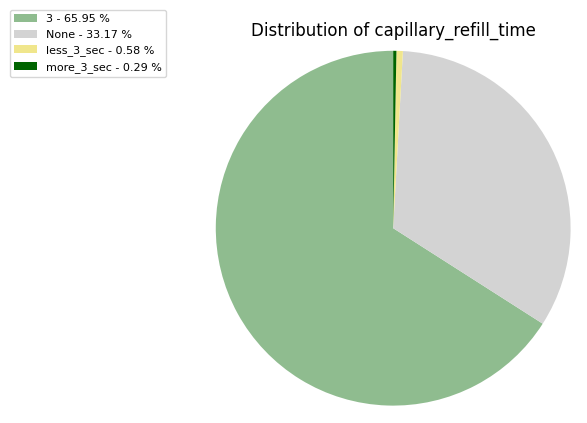

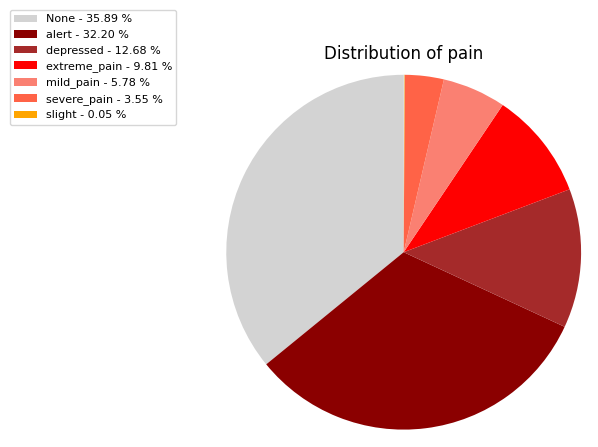

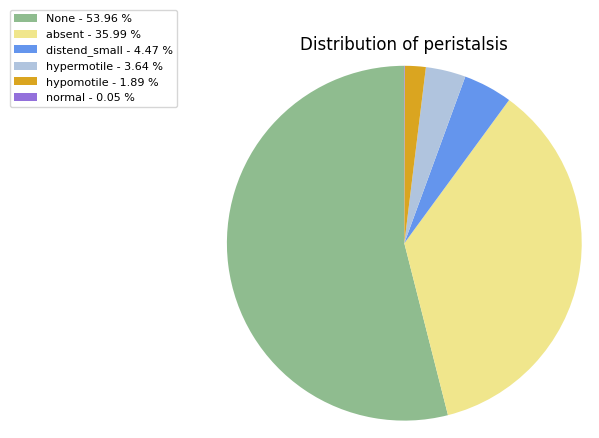

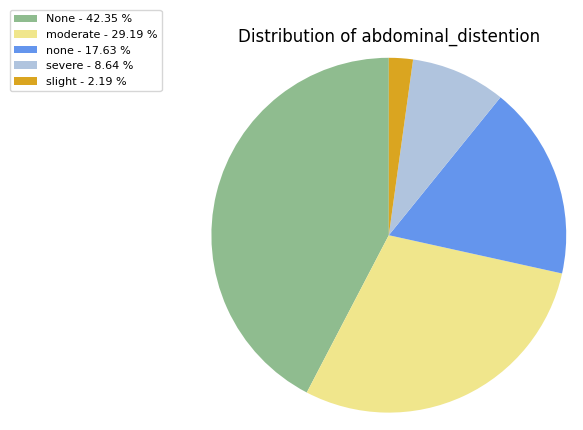

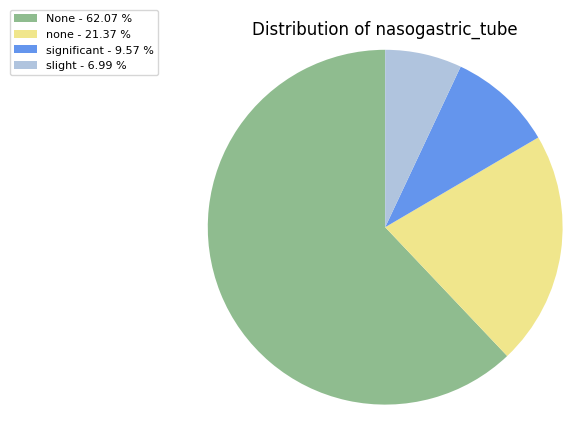

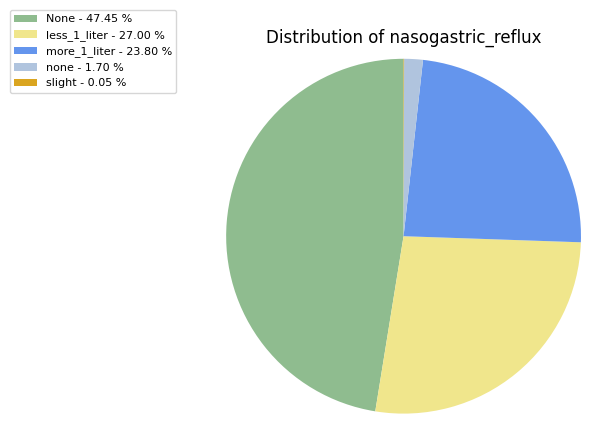

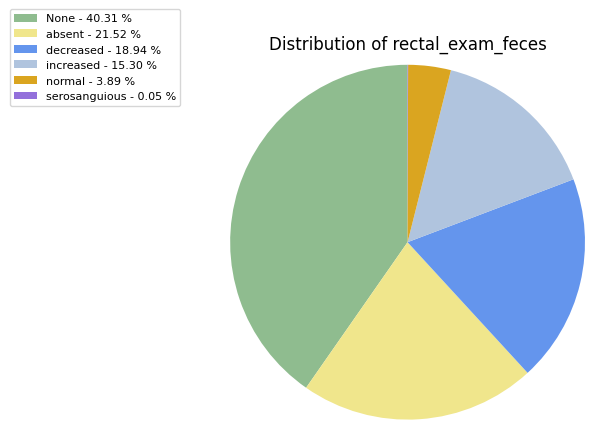

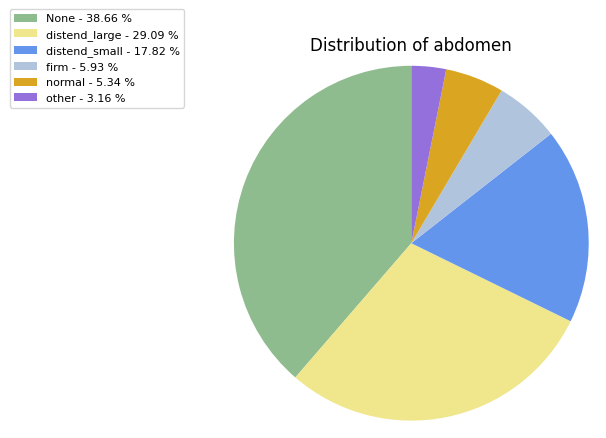

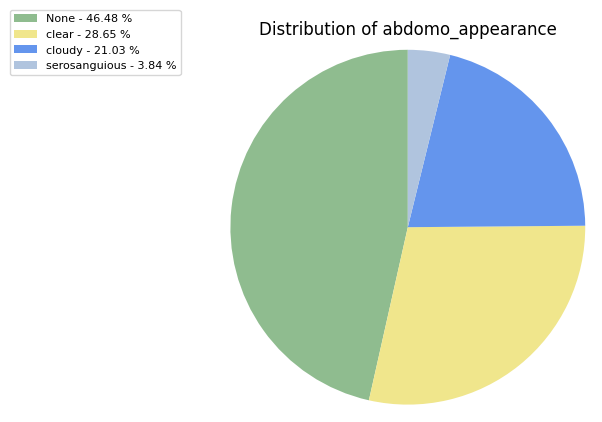

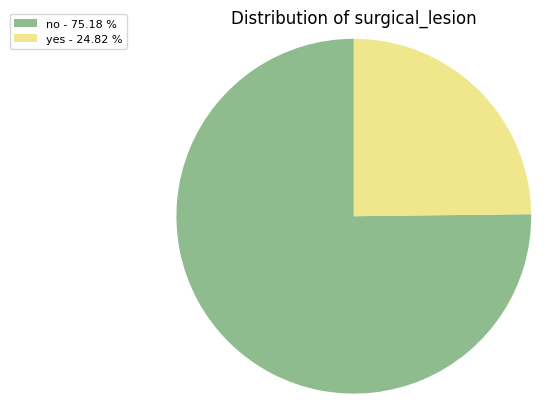

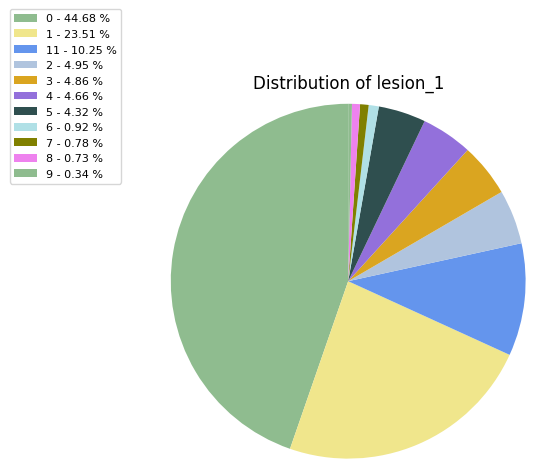

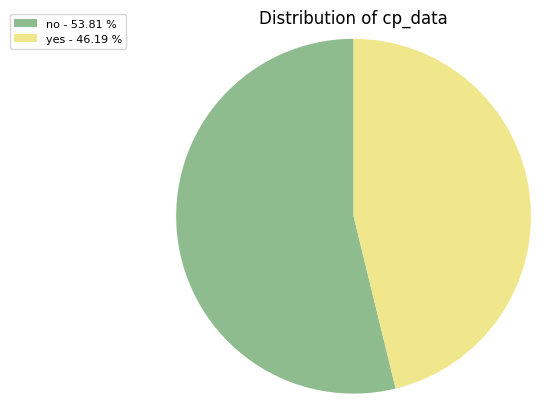

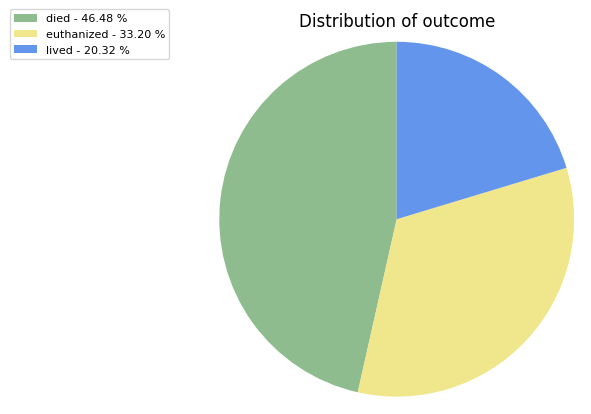

In [320]:
cat_data_desc_repr = train_data.describe(include=object)
print(cat_data_desc_repr)
colors_d = {'surgery':['khaki', 'darkseagreen'], 'age':['khaki', 'darkseagreen'], 'temp_of_extremities':['lightgrey', 'cornflowerblue', 'lightsteelblue', 'khaki', 'goldenrod'], 'peripheral_pulse':['lightgrey', 'red', 'orange', 'yellow', 'brown'], 'mucous_membrane':['whitesmoke', 'hotpink', 'firebrick', 'slateblue', 'pink', 'lavender', 'lightpink'], 'capillary_refill_time': ['darkseagreen', 'lightgray', 'khaki', 'darkgreen'], 'pain':['lightgray', 'darkred', 'brown', 'red', 'salmon', 'tomato', 'orange']}
for col in cat_data_desc_repr:
    counts = train_data[col].value_counts()
    counts = counts/sum(counts)

    x = np.unique(train_data[col].loc[train_data['id'] < first_id].values)
    y = counts
    percent = 100.*y/y.sum()

    colors = ['darkseagreen','khaki','cornflowerblue','lightsteelblue','goldenrod','mediumpurple', 'darkslategrey','powderblue','olive','violet']
    if col in colors_d:
      colors = colors_d[col]
    patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, loc='center right', bbox_to_anchor=(-0.1, 1.),
              fontsize=8)
    plt.title(f'Distribution of {col}')
    plt.show()


## **Data cleaning & transforming**

On the first try of predicting outcomes on `test_data`, we found out that `test_data` has some new values and misses some values compared to train_data which made the model trained on train data unapplicable to the `test_data`. That's why before training the model on the `train_data` we will merge it with `test_data`, clean and transform them (in the variable `train_data`) to the right format togeter and then split them back before training the model.


In [321]:
print(train_data.shape)

(2059, 29)


The next step is to clean the data from the outliers and transform it to the format suitable for machine learning compilation.

At first we need to deal with the `hospital_number` and `id` attributes. They contain IDs of the horses that don't impact the prediction of a horse's outcome in any way, but can confuse the model. Thus, we decided to get rid of it, so that the algorithm won't try to find the relations between the IDs and a horse's outcome.

We will drop `id` in the end when we will separate `test_data` from `train_data`for code's sufficiency.

In [322]:
train_data = train_data.drop(columns=['hospital_number'])

The next step is transforming string attributes with only two possible values to binary representation. These attributes are `surgery`, `age`, `surgical_lesion`, and `cp_data`.

In [323]:
train_data[['surgery', "surgical_lesion", "cp_data"]] = train_data[['surgery', "surgical_lesion", "cp_data"]].replace({'yes': 1, 'no': 0})
train_data['age'] = train_data['age'].replace({'adult': 1, 'young': 0})

We can make capillary refill time a binary attribute as well. It has three values of the speed of capillary refill: less than 3 seconds, 3 seconds, and more than 3 seconds, but there're few instances with the value "more_3_sec", as we can see on the graph above. In the documentation of the original dataset, on which our train set is based, there were only two values - less than 3 seconds or 3 and more. That's why we merge "3" and "more_3_sec", and assign "less_3_sec" values 0 and 1 for the rest of the instances.

In [324]:
train_data['capillary_refill_time'] = train_data['age'].replace({'less_3_sec':0, '3': 1, 'more_3_sec': 1})
train_data['nasogastric_reflux'] = train_data['nasogastric_reflux'].replace({'less_1_liter':0, "more_1_liter":1})

In the dataset, the null values are represented in string format. In some attributes,, the values "none" and "None" are separate. For consistency, we transform all of the "N/none" values from string to None.

In [325]:
train_data = train_data.replace({'None':None, 'none': None})

There is an outlier value for `nasogastric_reflux`. In the original documentation "slight" is not mentioned as a possible value. This could occur since the "slight" value is a possible value for `nasogastric_tube` that sounds quite similar. The percentage of its occurance is 0.08, so we just drop the instances with this value.

We also do the same with `pain` attribute and "slight" value, and "serosanguinous" for `rectal_exam_feces` as they're untypical for the attribues.

In [326]:
train_data = train_data[train_data['nasogastric_reflux'] != 'slight']
train_data = train_data[train_data['pain'] != 'slight']
train_data = train_data[train_data['rectal_exam_feces'] != 'serosanguinous']

In the data visualisation section, we've already talked about the attributes `lesion_1`, `lesion_2`, and `lesion_3` and performed transformations, so now we can the last two columns.

In [327]:
train_data = train_data.drop(columns=["lesion_2", "lesion_3"])
# train_data

The next step is to transform `outcome` values to those that can be processed by computer - to integers.

In [328]:
train_data['outcome'] = train_data['outcome'].replace({'lived': 0, 'died': 1, 'euthanized': 2})
train_data

,id,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,cp_data,outcome
0,0,1,1,38.1,132.0,24.0,cool,reduced,dark_cyanotic,1,...,decreased,distend_small,57.0,8.5,serosanguious,3.4,1,2,0,1.0
1,1,1,1,37.5,88.0,12.0,cool,normal,pale_cyanotic,1,...,absent,distend_small,33.0,64.0,serosanguious,2.0,1,2,0,2.0
2,2,1,1,38.3,120.0,28.0,cool,reduced,pale_pink,1,...,None,distend_large,37.0,6.4,serosanguious,3.4,1,5,0,0.0
3,3,1,1,37.1,72.0,30.0,cold,reduced,pale_pink,1,...,decreased,distend_small,53.0,7.0,cloudy,3.9,1,2,1,0.0
4,4,0,1,38.0,52.0,48.0,normal,normal,normal_pink,1,...,normal,normal,47.0,7.3,cloudy,2.6,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2054,0,1,40.3,114.0,36.0,cool,reduced,normal_pink,1,...,normal,distend_large,57.0,8.1,serosanguious,4.5,1,3,1,NaN
2055,2055,1,1,37.2,100.0,20.0,cool,reduced,pale_cyanotic,1,...,absent,distend_small,50.0,66.0,serosanguious,2.0,1,2,0,NaN
2056,2056,1,1,39.2,132.0,12.0,cool,reduced,dark_cyanotic,1,...,decreased,None,53.0,7.6,serosanguious,4.5,1,2,0,NaN
2057,2057,0,1,38.3,54.0,66.0,normal,normal,normal_pink,1,...,normal,None,49.0,8.6,clear,5.0,0,3,1,NaN


Now, we consider our data to be cleaned from the outliers, and transform categorical attributes to dummies.

In [329]:
train_data = pd.get_dummies(train_data, columns=['mucous_membrane', 'pain', 'peristalsis', 'abdominal_distention', \
                                                     'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'temp_of_extremities', \
                                                     'peripheral_pulse', 'nasogastric_tube', 'lesion_1'])


train_data, test_data = train_data.loc[train_data['id'] < first_id], train_data.loc[train_data['id'] >= first_id]
train_data = train_data.drop(columns=['id'])

print(train_data['outcome'].value_counts())
print(test_data.shape)


0.0    573
1.0    410
2.0    250
Name: outcome, dtype: int64
(824, 69)


We also need to check whether our data is balanced and whether it needs to be balanced. In our case, we will try not to balance the data to begin with because we assume that, in reality, euthanasia cases are minimised, so 250 such instances are suitable for us. Also, there is not such a critical difference between the number of surviving and dead horses at first glance, so we will try to train our model on the data without changes.

# **Predictive modeling**

## Problem discussion and methods choice justification
Before building and testing prediction models, we would like to discuss some aspects of the given problem and justify why we consider particular predictive models for this kind of problem.

The main aim of the model is to predict whether a horse with particular health aspects will live, die, or be euthanised. This kind of non-binary prediction that has as a result one of mutually exclusive labels is called a **multi-class classification problem**.

For this classification problem we do not have precisely the same approach as for binary classifiers. For multi-class classification a few classificators are being created following one of two strategies: either one-to-one or one-to-all. Main purpose of this strategy is to transform multiclass classification ploblem to some number of regular binary classification problems that we can solve.

One-vs-all strategy checks every class versus the rest of classes by creating a binary model for each case [*class vs. other classes*] and chooses the class that has the biggest confidence. One-vs-one, on the contrast, divides the problem to binary problems where every class is classified over the every other class like [*class vs. other class 1; class vs. other class 2;...*]; after that the class that was predicted the most number of times is chosen. The one-vs-one approach is considered to be more precise even though more time consuming as it requires more models to be created.[[1](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/)]

Most of the sklearn classifiers in Python use one-vs-all approach by default when we call the binary classifier for multi-class problem, so we don't need to create several separate models mannualy. In our project we will work mainly with two models: Random Forest and XGBСlassifier. Random Forest classifier is one of the most popular methods for solving multi-class problems, as well as XGBСlassifier.

## Data Preparation

Before training the prediction model, we need to divide the given train data into train and test datasets as we can not check the quality of models on Kaggle every time we do small changes.

In [330]:
from sklearn.model_selection import train_test_split

y = train_data['outcome']
X = train_data.drop(columns=['outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);
X_train

,surgery,age,rectal_temp,pulse,respiratory_rate,capillary_refill_time,nasogastric_reflux,nasogastric_reflux_ph,packed_cell_volume,total_protein,...,lesion_1_1,lesion_1_11,lesion_1_2,lesion_1_3,lesion_1_4,lesion_1_5,lesion_1_6,lesion_1_7,lesion_1_8,lesion_1_9
813,1,1,39.0,60.0,24.0,1,1,4.5,54.0,8.6,...,0,0,0,1,0,0,0,0,0,0
89,0,1,38.3,104.0,40.0,1,None,3.0,54.0,7.4,...,0,0,0,1,0,0,0,0,0,0
842,1,1,38.2,36.0,16.0,1,1,2.0,37.0,75.0,...,0,0,0,1,0,0,0,0,0,0
1126,1,0,38.0,104.0,70.0,0,1,2.0,47.0,54.0,...,0,0,1,0,0,0,0,0,0,0
1142,1,1,38.7,120.0,48.0,1,1,2.0,56.0,64.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1,1,37.4,104.0,12.0,1,1,4.0,75.0,8.8,...,0,0,1,0,0,0,0,0,0,0
1096,0,1,38.5,68.0,20.0,1,1,2.0,50.0,75.0,...,0,0,0,0,0,0,0,0,0,0
1131,1,1,38.0,108.0,12.0,1,None,4.0,47.0,6.3,...,0,0,1,0,0,0,0,0,0,0
861,1,1,38.2,80.0,42.0,1,1,1.5,52.0,7.0,...,0,0,0,0,0,1,0,0,0,0


## Random Forest Classifier
RF model is quite popular for solving multi-class classification problems. We chose it for our dataset as it can handle the imbalanced data (what can be the case with our dataset). The method is also deals with outliers and doesn't require too specific data preparations techniques that made it easier to work with.[[2](https://burakozen.medium.com/multi-class-classification-on-imbalanced-data-using-random-forest-algorithm-in-spark-5b3d0af9b93f#:~:text=Random%20Forest%20works%20well%20with,features%20at%20the%20same%20time)]

Our data contains many null values that are not natively processed by Random Forest Classifier. That's why before training the model we need to fill all the null values. In the next cells we will handle the empty values using two different methods: **filling with mean values** and **MICE (Multiple Imputation by Chained Equations)** to check whether there is some difference in model's outcomes based on the data preparation method. [[3](https://www.analyticsvidhya.com/blog/2022/05/handling-missing-values-with-random-forest/)]


In [331]:
# Imports
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [332]:
# Imports for plots
import seaborn as sns
import matplotlib.pyplot as plt

In [333]:
# Additional data preparations
# print(X[X.isnull().any(axis=1)])

# Filling with mean
X_fill_mean = X.fillna(X.mean())
X_train_mean, X_test_mean, _, _ = train_test_split(X_fill_mean, y, test_size=0.2, random_state=42)

# Filling with MICE
# Based on article: https://www.machinelearningplus.com/machine-learning/mice-imputation/
X_copy = X.copy()

#print(missing_values)
imputer = IterativeImputer(max_iter=10, random_state=42)
imputer.fit(X_copy)
imputed_values = imputer.transform(X_copy)
X_mice = pd.DataFrame(imputed_values, columns=X.columns)

X_train_mice, X_test_mice, _, _ = train_test_split(X_mice, y, test_size=0.2, random_state=42)

In [334]:
'''
The filled values are different.
When we ran MICE and mean methods for the first time, the difference
between the values were bigger, but after few more times of running the
values are close.
'''
print(X_mice.loc[2].tolist(), '\n', X_fill_mean.loc[2].tolist())

[1.0, 1.0, 38.3, 120.0, 28.0, 1.0, 0.6864996624392444, 3.5, 37.0, 6.4, 3.4, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] 
 [1.0, 1.0, 38.3, 120.0, 28.0, 1.0, 0.6855845629965948, 3.5, 37.0, 6.4, 3.4, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


Here, we initialise the Random Forest model and test it with two resulting data frames, `X_fill_mean` and `X_mice`.

We use precision instead of accuracy to evaluate the model's success, which is more common. We do so because accuracy doesn't consider the class balance, which is quite important in the case of a multi-class problem, as some classes could be more important than others. For example, it's much important to classify class `died` correctly for insurance companies or doctors than `lived` class. Precision metric, on the other hand, considers each class separately which could be more useful in our case. [[4](https://www.evidentlyai.com/classification-metrics/multi-class-metrics#:~:text=Accuracy%20is%20straightforward%20to%20interpret.&text=87%25!,classes%20might%20be%20more%20prevalent.)]

In [335]:
# Train the initial RF model with mean X
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)
rf_model.fit(X_train_mean, y_train)
y_pred_mean = rf_model.predict(X_test_mean)

# Train the initial RF model with null vals filled with MICE
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=100)
rf_model2.fit(X_train_mice, y_train)
y_pred_mice = rf_model.predict(X_test_mice)

precision_mean = precision_score(y_test, y_pred_mean, average='weighted')
precision_mice = precision_score(y_test, y_pred_mice, average='weighted')

print(precision_mean, precision_mice)

0.6776957816167709 0.6776957816167709


In [336]:
print(np.mean(cross_val_score(rf_model, X_train_mean, y_train, cv=10)))
print(np.mean(cross_val_score(rf_model2, X_train_mice, y_train, cv=10)))

0.7089878375592661
0.7008864151721295


Tuning hyperparameters with Grid search (lasted for one minute, so maybe we need to consider some changes in our model - find some attributes that are nor necesary for predictions).

In [337]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train_mean, y_train)
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

Best Hyperparameters for the first Random Forest model: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [338]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train_mice, y_train)
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

Best Hyperparameters for the second Random Forest model:{ 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Retraining the models.

In [339]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rf_model.fit(X_train_mean, y_train)
y_pred_mean = rf_model.predict(X_test_mean)

# Train teh initial RF model with null vals filled with MICE
rf_model2 = RandomForestClassifier(n_estimators=150, random_state=100, max_depth=20, min_samples_leaf=1, min_samples_split=2)
rf_model2.fit(X_train_mice, y_train)
y_pred_mice = rf_model.predict(X_test_mice)

precision_mean = precision_score(y_test, y_pred_mean, average='weighted')
precision_mice = precision_score(y_test, y_pred_mice, average='weighted')

print('Precision scores: ', precision_mean, precision_mice)
print('Cross-validation: ', np.mean(cross_val_score(rf_model, X_train_mean, y_train, cv=10)), np.mean(cross_val_score(rf_model2, X_train_mice, y_train, cv=10)))


Precision scores:  0.6776957816167709 0.6776957816167709
Cross-validation:  0.7089878375592661 0.7018449804164091


From the results above, we can see that the precision score for two models are the same, but the cross validation indicates that data that has null values filled with mean works slightly batter across the data set.

To see the correctness of prediction we plot the confusion matrix.

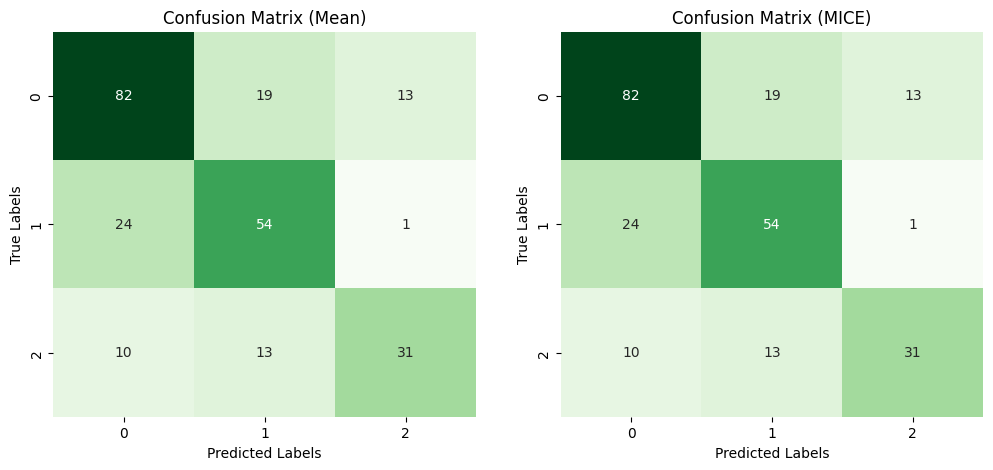

In [340]:
cm_mean = confusion_matrix(y_test, y_pred_mean)
cm_mice = confusion_matrix(y_test, y_pred_mice)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Confusion Matrix 1
sns.heatmap(cm_mean, annot=True, fmt="d", cmap="Greens", cbar=False, ax=axs[0])
axs[0].set_title("Confusion Matrix (Mean)")
axs[0].set_xlabel("Predicted Labels")
axs[0].set_ylabel("True Labels")

# Plot Confusion Matrix 2
sns.heatmap(cm_mice, annot=True, fmt="d", cmap="Greens", cbar=False, ax=axs[1])
axs[1].set_title("Confusion Matrix (MICE)")
axs[1].set_xlabel("Predicted Labels")
axs[1].set_ylabel("True Labels")

plt.show()


We can see above the confusion in predicting classes and distinguishing one class from another. For instance, class 1 ('dead') is often identified as class 0 ('lived') which is quite problematic.

We know that in default Random Forest Classifier the classification for multi-class data is based on One-vs-Rest principle mentioned above. We would like to improve our model by the usage of One-vs-One principle since it distinguishes one class from others seoarately it should improve the situation with confusion and increase the precision of the prediction.

In [341]:
from sklearn.multiclass import OneVsOneClassifier

OvO_rf_model = OneVsOneClassifier(RandomForestClassifier(n_estimators=150, random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)).fit(X_train_mean, y_train)
OvO_rf_model_mice = OneVsOneClassifier(RandomForestClassifier(n_estimators=150, random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2)).fit(X_train_mice, y_train)

y_pred_mean = OvO_rf_model.predict(X_test_mean)
y_pred_mice = OvO_rf_model_mice.predict(X_test_mice)
y_pred_mean_rf_compare = y_pred_mean.copy()
precision_mean = precision_score(y_test, y_pred_mean, average='weighted')
precision_mice = precision_score(y_test, y_pred_mice, average='weighted')

print('Precision scores: ', precision_mean, precision_mice)
print('Cross-validation:  ', np.mean(cross_val_score(rf_model, X_train_mean, y_train, cv=10)), np.mean(cross_val_score(rf_model2, X_train_mice, y_train, cv=10)))
print(f"Score for mean and MICE datasets: {OvO_rf_model.score(X_test_mean, y_test), OvO_rf_model.score(X_test_mice, y_test)}")

Precision scores:  0.7043174444070301 0.7277689903984303
Cross-validation:   0.7089878375592661 0.7018449804164091
Score for mean and MICE datasets: (0.7004048582995951, 0.7004048582995951)


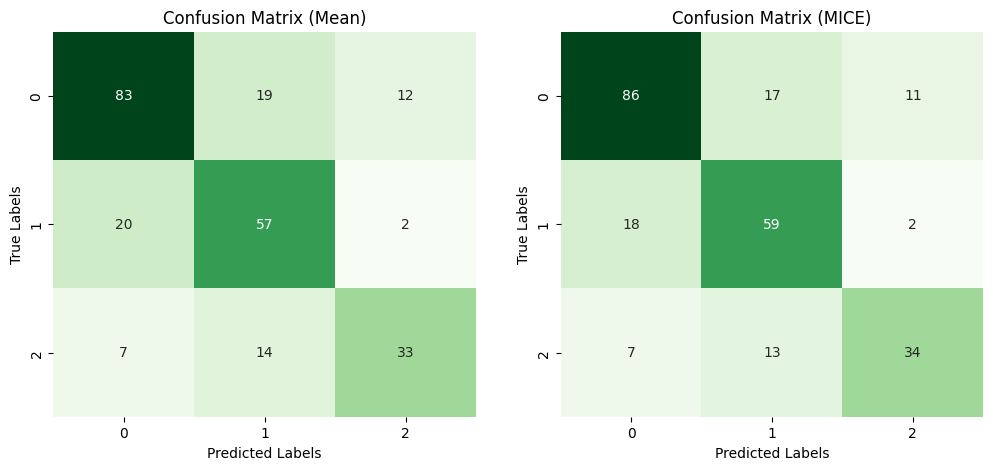

In [342]:
cm_mean_OvO = confusion_matrix(y_test, y_pred_mean)
cm_mice_OvO = confusion_matrix(y_test, y_pred_mice)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Confusion Matrix 1
sns.heatmap(cm_mean_OvO, annot=True, fmt="d", cmap="Greens", cbar=False, ax=axs[0])
axs[0].set_title("Confusion Matrix (Mean)")
axs[0].set_xlabel("Predicted Labels")
axs[0].set_ylabel("True Labels")

# Plot Confusion Matrix 2
sns.heatmap(cm_mice_OvO, annot=True, fmt="d", cmap="Greens", cbar=False, ax=axs[1])
axs[1].set_title("Confusion Matrix (MICE)")
axs[1].set_xlabel("Predicted Labels")
axs[1].set_ylabel("True Labels")

plt.show()

We can see above that the usage of One-vs-One method increased the precision (we can see that this performs better on MICE train set), but the overall score of prediction across different samples of dataset remained the same. Thus, even though MICE dataset gives better precision, it still works slightly worse with the model than the mean one.

## XGBСlassifier
The second model we use is XGBClassifier. XGBOOST (eXtreme Gradient Boosting) is a model that uses boosting algorithms to improve prediction accuracy. It is an ensemble technique where new models are added to correct the errors made by existing models until no further improvements in the results can be made. ["XGBoost dominates the structured data or tabular datasets on classification and regression techniques of predictive modeling problems. On a side note, it is the defacto or the go to algorithm used by many winners on Kaggle Competitive Data Science platform."](https://www.sqlservercentral.com/articles/model-selection-and-performance-boosting-with-k-fold-cross-validation-and-xgboost)

Moreover, XGBoost is also decision-tree-based, which makes it a suitable option for our multi-classification problem.
In parameter grid we included the next hypermaters:
- n_estimators: number of boosting rounds (trees) to be run. Increasing the number of trees generally improves performance but comes with a trade-off in terms of computational cost.
- max__depth: the depth of each tree.
- learning_rate: contribution of each tree to the final prediction.
- colsample_bytree:  fraction of features to be randomly sampled for building each tree

Searching for best hyperparameters we will use GridSearch. Specified parameter cv to 10 we used  stratified cross validation(StratifiedKFold) to enforce class distributions for an imbalance in instances for each class in our data.

In [343]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
'n_estimators': range(6, 10),
'max_depth': range(4, 7),
'learning_rate': [.1, .3, .4],
'colsample_bytree': [.3, .4, .5, .7]
}

xgb = XGBClassifier()
g_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, return_train_score=True)

# train_mean
g_search.fit(X_train_mean, y_train)
print(g_search.best_params_)
print(g_search.score(X_test_mean,y_test))

# train_mice
g_search.fit(X_train_mice, y_train)
print(g_search.best_params_)
print(g_search.score(X_test_mice,y_test))


{'colsample_bytree': 0.7, 'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 7}
0.7165991902834008
{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 7}
0.708502024291498


In [344]:
xgb_params_mean = {'colsample_bytree': 0.7, 'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 7}
xgb_params_mice = {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 7}
model_mean = XGBClassifier(**xgb_params_mean)
model_mice = XGBClassifier(**xgb_params_mice)

# training models with best hyperparameters and evaluating their precision
mean_model = model_mean.fit(X_train_mean, y_train)
mice_model = model_mice.fit(X_train_mice, y_train)
print(f"Score for xgb mean_model: {mean_model.score(X_test_mean, y_test)}")
print(f"Score for xgb mice_model: {mice_model.score(X_test_mice, y_test)}")
y_pred_mean = mean_model.predict(X_test_mean)
y_pred_mice = mice_model.predict(X_test_mice)
y_pred_xgb_compare = y_pred_mean.copy()
precision_mean = precision_score(y_test, y_pred_mean, average='weighted')
precision_mice = precision_score(y_test, y_pred_mice, average='weighted')

print(f"Precision of xgb mean_model: {precision_mean}\nPrecision of xgb mice_model: {precision_mice}")



Score for xgb mean_model: 0.7165991902834008
Score for xgb mice_model: 0.708502024291498
Precision of xgb mean_model: 0.7197726422329139
Precision of xgb mice_model: 0.713832157684365


We got the following results:

Score for xgb mean_model: 0.7165991902834008

Score for xgb mice_model: 0.708502024291498

Precision of xgb mean_model: 0.7197726422329139

Precision of xgb mice_model: 0.713832157684365

The model for the data where the missing values were filled in using the mean method is a bit more accurate, so we will use this data when trying to improve our model further. To improve the model, let's try to look at the importance of each feature in it.

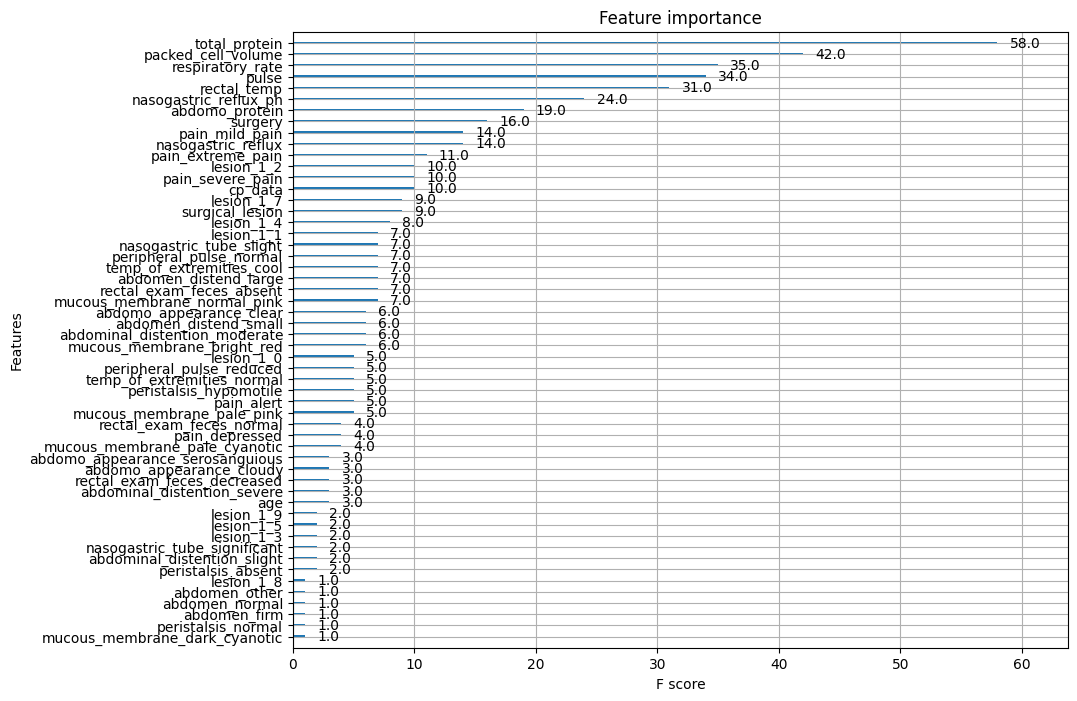

In [345]:
# visualisation of features importance
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(mean_model, ax=ax)
plt.show()

When training the model, let's try not to take into account those features that are smaller than the treshhold we have chosen.

In [346]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=UserWarning)
# Fit model using each importance as a threshold
model_mean_sel = XGBClassifier()
mean_model_sel = model_mean_sel.fit(X_train_mean, y_train)
thresholds = sort(mean_model_sel.feature_importances_)
for thresh in thresholds:
    # select features using threshold(https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/)
    selection = SelectFromModel(mean_model_sel, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_mean)

    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)

    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = precision_score(y_test, y_pred, average='weighted')
    print("Thresh=%.5f, n=%d, Precision: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00000, n=67, Precision: 69.96%
Thresh=0.00164, n=57, Precision: 69.96%
Thresh=0.00472, n=56, Precision: 70.52%
Thresh=0.00747, n=55, Precision: 71.66%
Thresh=0.00821, n=54, Precision: 71.66%
Thresh=0.00824, n=53, Precision: 70.65%
Thresh=0.00851, n=52, Precision: 73.13%
Thresh=0.00919, n=51, Precision: 70.73%
Thresh=0.00984, n=50, Precision: 73.43%
Thresh=0.01018, n=49, Precision: 71.59%
Thresh=0.01043, n=48, Precision: 72.46%
Thresh=0.01076, n=47, Precision: 71.32%
Thresh=0.01103, n=46, Precision: 69.86%
Thresh=0.01139, n=45, Precision: 70.98%
Thresh=0.01146, n=44, Precision: 69.59%
Thresh=0.01157, n=43, Precision: 70.39%


From the results, we can see that using all 67 features is not reasonable, because if we reduce the number of features used even to 30, our accuracy will decrease to 70.49%. Now let's try running GridSearch again to find the best hyperparameters.

In [347]:
thresh = 0.01336
model_mean_sel = XGBClassifier()
mean_model_sel = model_mean.fit(X_train_mean, y_train)
selection = SelectFromModel(mean_model_sel, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train_mean)

param_grid = {
'n_estimators': range(6, 10),
'max_depth': range(4, 7),
'learning_rate': [.1, .3, .4],
'colsample_bytree': [.3, .4, .5, .7]
}
g_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, return_train_score=True)

# train_mean
g_search.fit(select_X_train, y_train)
print(g_search.best_params_)
select_X_test = selection.transform(X_test_mean)
print(g_search.score(select_X_test,y_test))

{'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 7}
0.7004048582995951


In [348]:
model_mean_sel = XGBClassifier(**g_search.best_params_)

# training models with best hyperparameters and evaluating their precision
mean_model_sel = model_mean_sel.fit(select_X_train, y_train)
print(f"Score for xgb mean_model: {mean_model_sel.score(select_X_test, y_test)}")
y_pred_mean = mean_model_sel.predict(select_X_train)


Score for xgb mean_model: 0.7004048582995951


# **Test Data**

Here we are testing our models and writing down the results into csv to submit to Kaggle competition.

<Figure size 800x600 with 0 Axes>

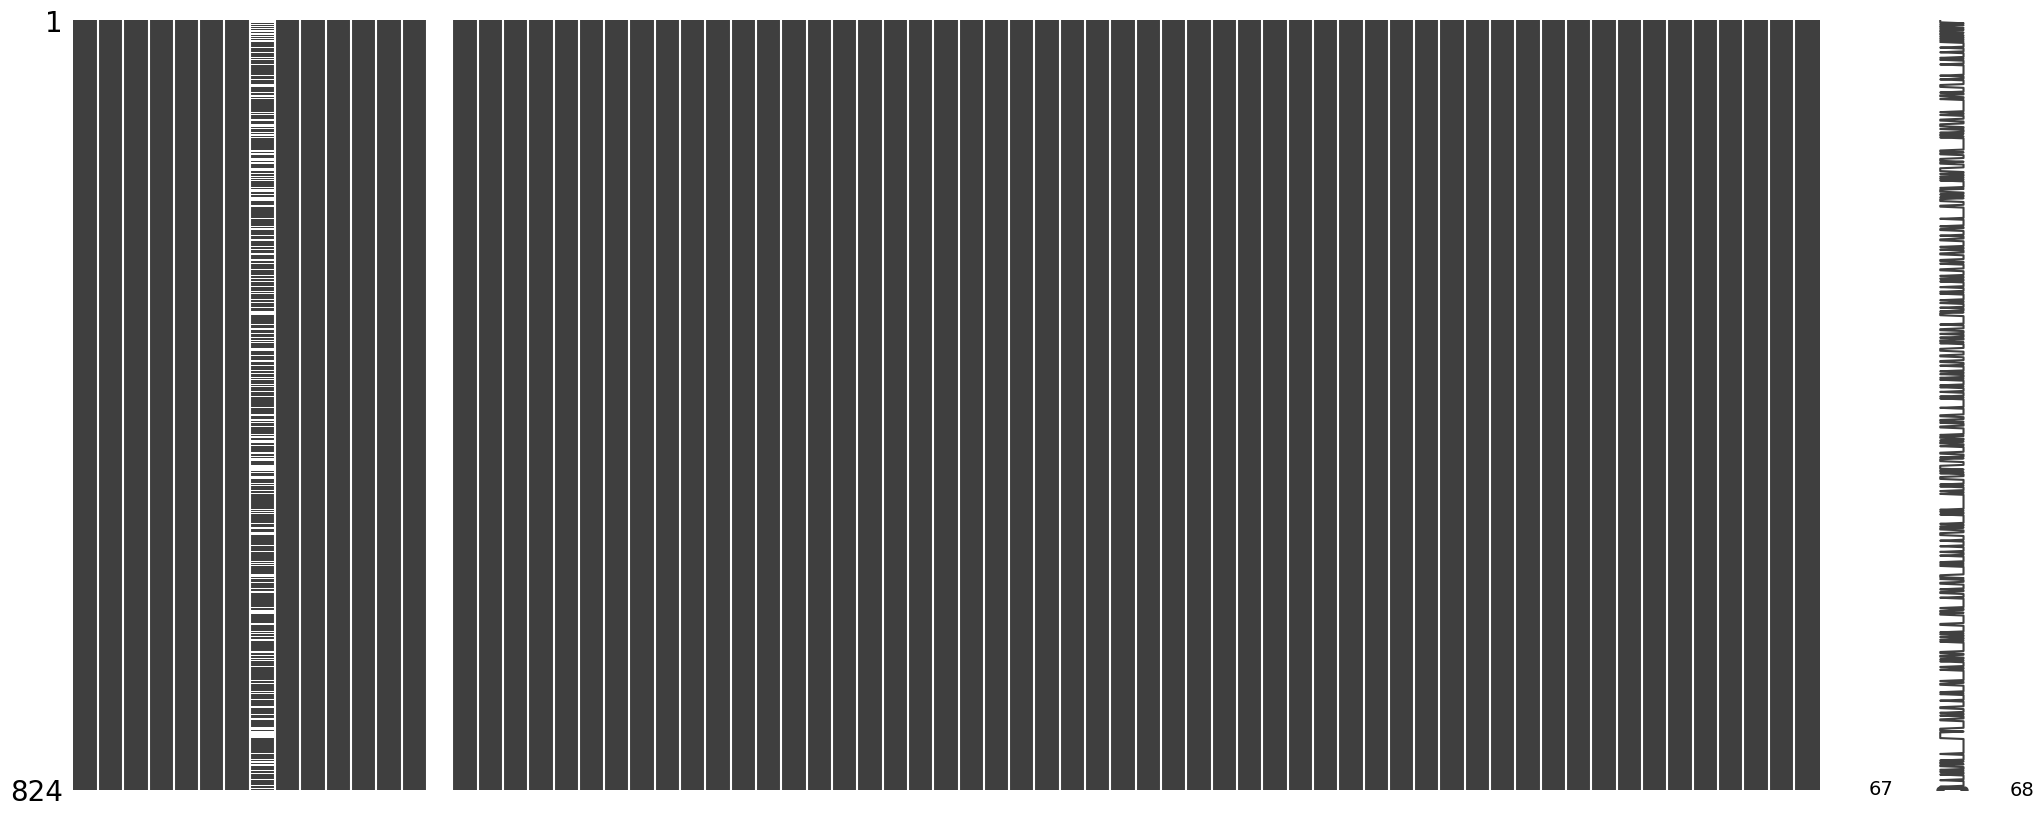

In [349]:
import missingno as msno

plt.figure(figsize=(8, 6))
msno.matrix(test_data)
plt.show()

test_data_mean = test_data.fillna(test_data.mean())
test_data_mean = test_data_mean.drop(columns=['id', 'outcome'])
y_test_pred_rf = OvO_rf_model.predict(test_data_mean)
df = pd.DataFrame({'id': ids, 'outcome': pd.DataFrame(y_test_pred_rf).replace({0:'lived', 1:'died', 2:'euthanized'})[0]})
df.set_index('id', inplace=True)
df.to_csv('results_rf.csv')


y_test_pred_xgb = mean_model.predict(test_data_mean)
# print(y_test_pred_xgb)
df = pd.DataFrame({'id': ids, 'outcome': pd.DataFrame(y_test_pred_xgb).replace({0:'lived', 1:'died', 2:'euthanized'})[0]})
df.set_index('id', inplace=True)
# print(df)
df.to_csv('results_xgb.csv')


test_data_mean = test_data.fillna(test_data.mean())
test_data_mean = test_data_mean.drop(columns=['id', 'outcome'])
select_test_data = selection.transform(test_data_mean)
y_test_pred_xgb_sel = mean_model_sel.predict(select_test_data)
# print(y_test_pred_xgb_sel)
df = pd.DataFrame({'id': ids, 'outcome': pd.DataFrame(y_test_pred_xgb_sel).replace({0:'lived', 1:'died', 2:'euthanized'})[0]})
df.set_index('id', inplace=True)
# print(df)
df.to_csv('results_xgb_sel.csv')


## **Comparing of XGBoost and Random Forest**

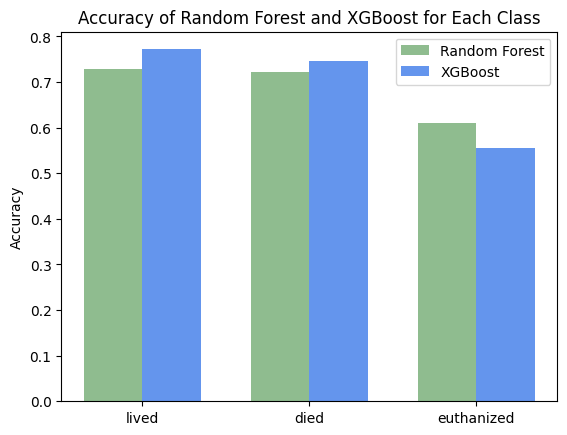

In [350]:
from sklearn.metrics import accuracy_score
classes = np.unique(y)
class_names = {0: 'lived', 1: 'died', 2: 'euthanized'}
rf_accuracies = [accuracy_score(y_test[y_test == c], y_pred_mean_rf_compare[y_test == c]) for c in classes]
xgb_accuracies = [accuracy_score(y_test[y_test == c], y_pred_xgb_compare[y_test == c]) for c in classes]

# Create a grouped bar plot
bar_width = 0.35
index = np.arange(len(classes))

plt.bar(index - bar_width/2, rf_accuracies, bar_width, label='Random Forest', color='darkseagreen')
plt.bar(index + bar_width/2, xgb_accuracies, bar_width, label='XGBoost', color='cornflowerblue')

# Customize the plot
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest and XGBoost for Each Class')
plt.xticks(index, [class_names[c] for c in classes])
plt.legend()
plt.savefig('accuracy.png', bbox_inches='tight')
plt.show()

# **Data processing 2**
Now we're going to try to master the "black art" once again and take a fresh approach to data preprocessing. Instead of converting categorical data using get_dummies, we'll replace the categories with numbers. For example,'None': None, 'cold': 0, 'cool': 1, 'normal':2, 'warm':3

In [351]:
import pandas as pd
import numpy as np
train_data_2 = pd.read_csv('train.csv')
test_data_2 = pd.read_csv('test.csv')
train_data_2['source'] = 'train'
test_data_2['source'] = 'test'

all_data = pd.concat([train_data_2, test_data_2], ignore_index=True)

In [352]:
all_data.drop(columns=['id','hospital_number', 'lesion_1', 'lesion_2', 'lesion_3'], inplace=True)

In [353]:
np.unique(all_data['temp_of_extremities'])
all_data['temp_of_extremities'] = all_data['temp_of_extremities'].replace({'None': None, 'cold': 0, 'cool': 1, 'normal':2, 'warm':3})
np.unique(all_data['peripheral_pulse'])
all_data['peripheral_pulse'] = all_data['peripheral_pulse'].replace({'None': None, 'absent': 0, 'increased': 1, 'normal':2, 'reduced':3})
np.unique(all_data['mucous_membrane'])
all_data['mucous_membrane'] = all_data['mucous_membrane'].replace({'None': None, 'bright_pink': 0, 'bright_red': 1, 'dark_cyanotic':2, 'normal_pink':3, 'pale_cyanotic': 4, 'pale_pink': 5})
pain = np.unique(all_data['pain'])
all_data['pain'] = all_data['pain'].replace({'None': None, 'mild_pain': 0, 'slight': 0, 'moderate':0, 'depressed':1, 'severe_pain': 2, 'extreme_pain': 3, 'alert': 4})
perist = np.unique(all_data['peristalsis'])
all_data['peristalsis'] = all_data['peristalsis'].replace({'None': None, 'absent': 0, 'distend_small':1, 'hypermotile': 2, 'hypomotile': 3, 'normal': 4})
abd_dist = np.unique(all_data['abdominal_distention'])
all_data['abdominal_distention'] = all_data['abdominal_distention'].replace({'None': None, 'none': None, 'slight': 0, 'moderate':1, 'severe': 2})
nas_tube= np.unique(all_data['nasogastric_tube'])
all_data['nasogastric_tube'] = all_data['nasogastric_tube'].replace({'None': None, 'none': None, 'slight': 0, 'significant':1})
nas_rflx= np.unique(all_data['nasogastric_reflux'])
all_data['nasogastric_reflux'] = all_data['nasogastric_reflux'].replace({'None': None, 'none': None, 'slight': 0, 'more_1_liter': 1, 'less_1_liter': 2})
abdomen = np.unique(all_data['abdomen'])
all_data['abdomen'] = all_data['abdomen'].replace({'None': None, 'normal': 0, 'other': 1, 'distend_small': 2, 'distend_large': 3, 'firm': 4})
abdomo_ap = np.unique(all_data['abdomen'])
all_data['abdomo_appearance'] = all_data['abdomo_appearance'].replace({'None': None, 'clear': 0, 'cloudy': 1, 'serosanguious': 2})
feces = np.unique(all_data['rectal_exam_feces'])
all_data['rectal_exam_feces'] = all_data['rectal_exam_feces'].replace({'None': None, 'normal': 0, 'decreased': 1, 'serosanguious': 2, 'increased': 3, 'absent': 4})
all_data['capillary_refill_time'] = all_data['capillary_refill_time'].replace({'None': None, 'less_3_sec':0, '3': 1, 'more_3_sec': 1})

In [354]:
all_data[['surgery', "surgical_lesion", "cp_data"]] = all_data[['surgery', "surgical_lesion", "cp_data"]].replace({'yes': 1, 'no': 0})
all_data['age'] = all_data['age'].replace({'adult': 1, 'young': 0})

In [355]:
# check whether all data was transformed
# for c in all_data.columns:
#     print(f'{c}\n{all_data[c].describe()}')

Axes(0.125,0.11;0.698618x0.77)


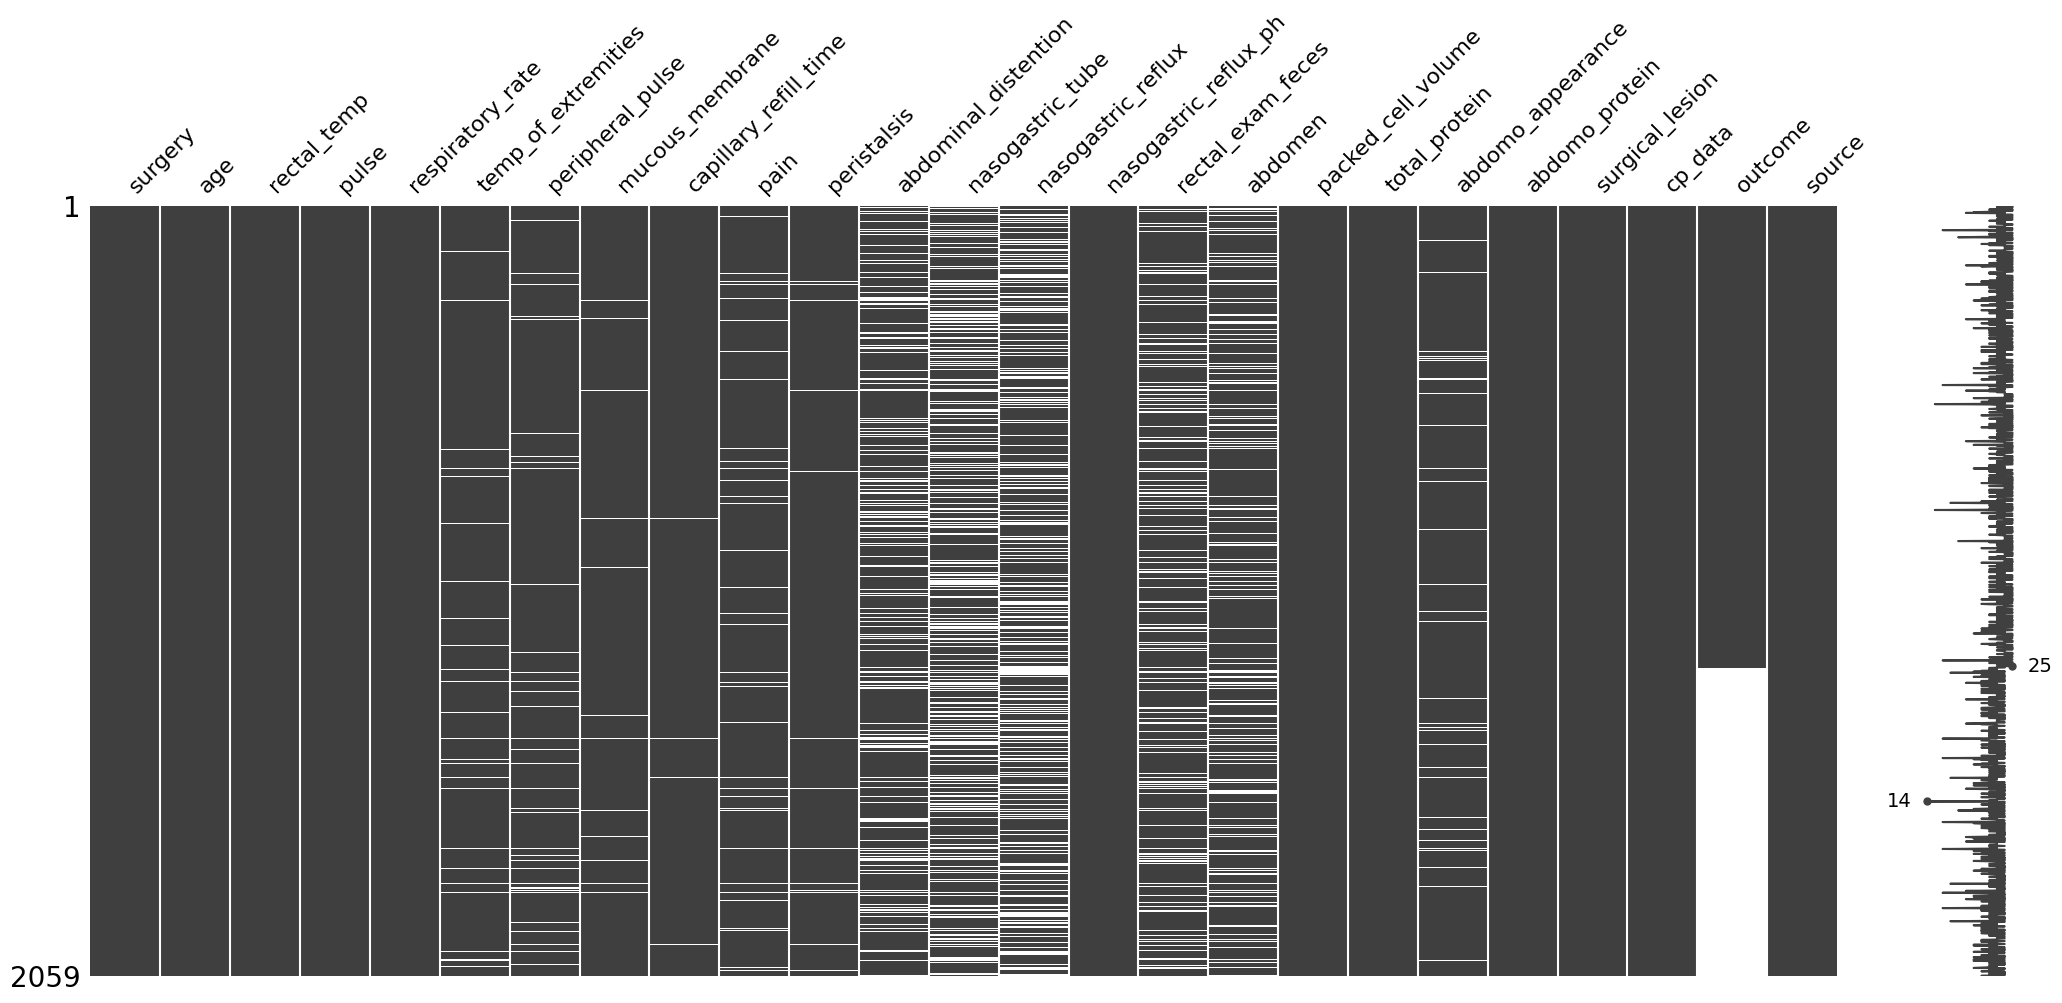

In [356]:
# check missing values
import missingno as msno
print(msno.matrix(all_data))

<ipython-input-357-4392112a0c67>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_data.fillna(all_data.mean(), inplace=True)


<Axes: >

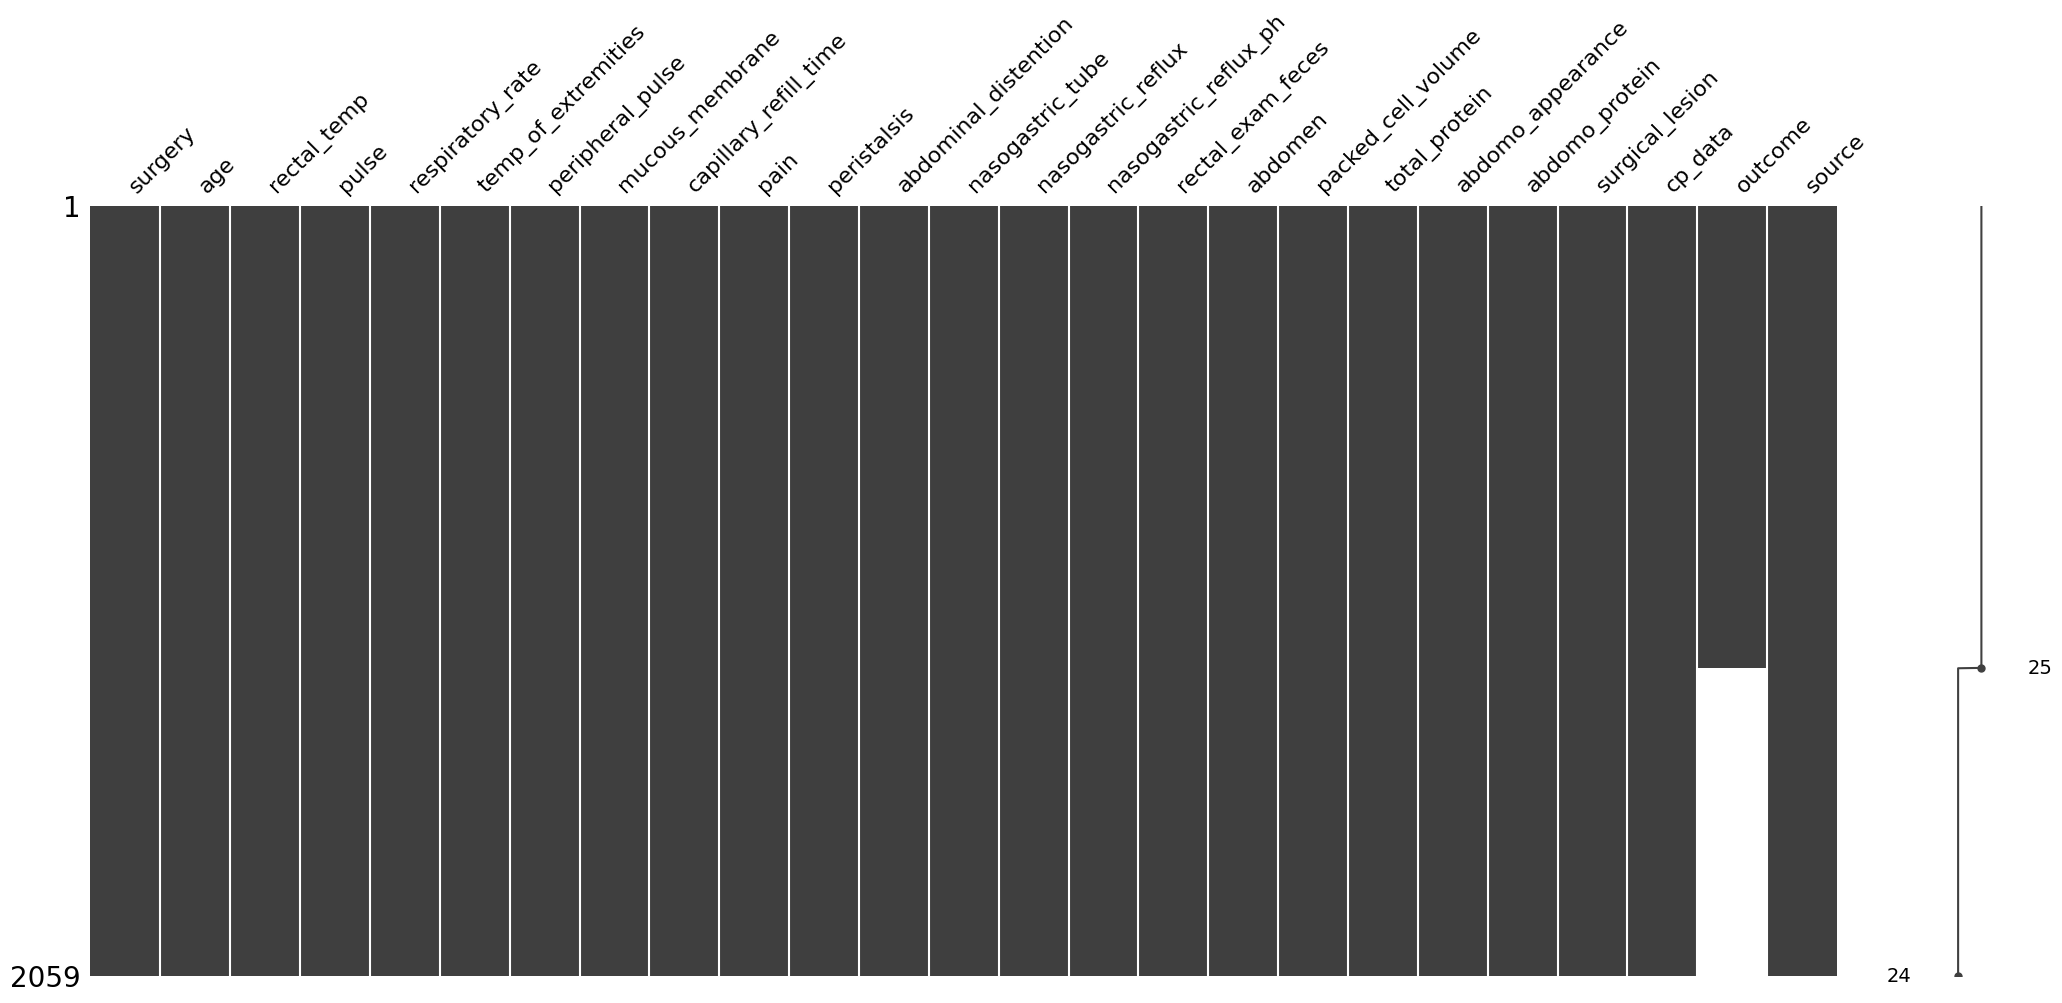

In [357]:
# there are a lot of missing values in abdominal_distention, nasogastric_reflux and nasogastric_tube columns
# consider their deleting later
# all_data.drop(columns=['abdominal_distention', 'nasogastric_reflux', 'nasogastric_tube'], inplace=True)
all_data.fillna(all_data.mean(), inplace=True)
msno.matrix(all_data)

Now we will identify outliers and decide on data nomalizing data.

rectal_temp


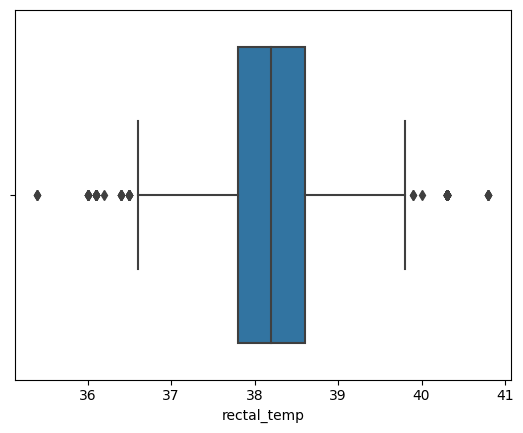

pulse


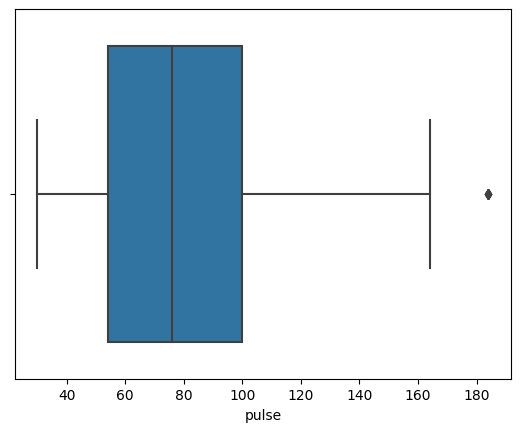

respiratory_rate


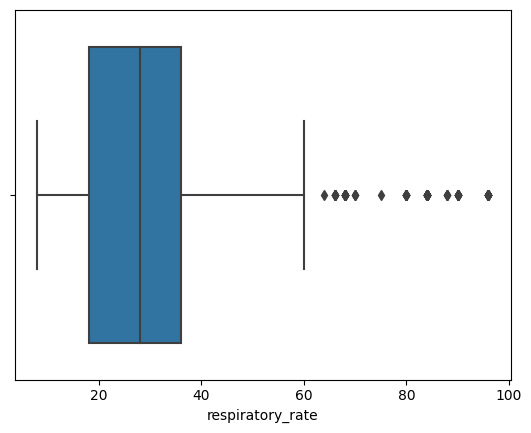

nasogastric_reflux_ph


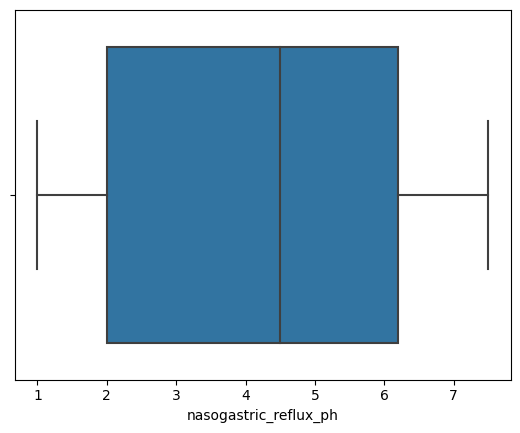

packed_cell_volume


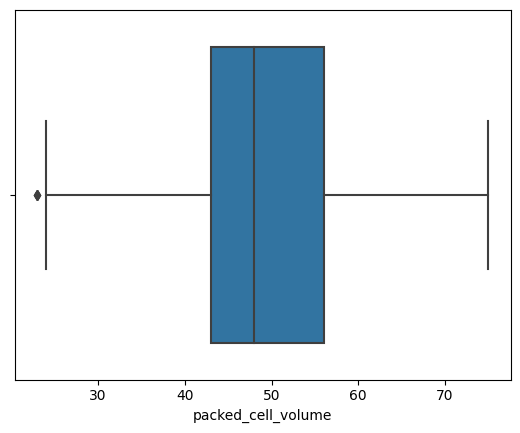

total_protein


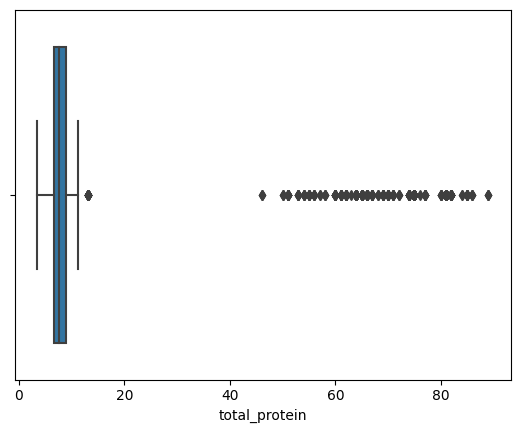

abdomo_protein


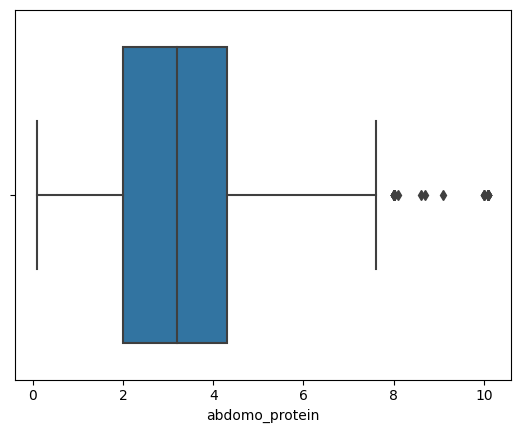

In [358]:
# indentify outliers
from scipy.stats import zscore
columns_to_normalize = ['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein']

import seaborn as sns

# Box plot for a specific column
for col in columns_to_normalize:
    print(col)
    sns.boxplot(x=all_data[col])
    plt.show()

# all the values seems to be rather extreme values than errors in data
# as we are using decision tree-based models, such as random forests or gradient boosting, which are generally not sensitive to the scale of features, we will not normalize the data

In [359]:
train_data_2, test_data_2 = all_data[all_data['source'] == 'train'], all_data[all_data['source'] == 'test']
# train_data_2 = train_data_2.drop(columns=['source'], inplace=True)
# test_data_2 = test_data_2.drop(columns=['source'], inplace=True)

In [360]:
train_data_2.drop(columns='source', inplace=True)
test_data_2.drop(columns='source', inplace=True)

<ipython-input-360-b80246a8b435>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_2.drop(columns='source', inplace=True)
<ipython-input-360-b80246a8b435>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_2.drop(columns='source', inplace=True)


In [361]:
outcome_transform = {'lived': 0, 'died': 1, 'euthanized': 2}
train_data_2 = train_data_2.replace(outcome_transform)
train_data_2

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,cp_data,outcome
0,1,1,38.1,132.0,24.0,1.0,3.0,2.0,1.0,1.0,...,6.5,1.000000,2.0,57.0,8.5,2.0,3.4,1,0,1
1,1,1,37.5,88.0,12.0,1.0,2.0,4.0,1.0,0.0,...,2.0,4.000000,2.0,33.0,64.0,2.0,2.0,1,0,2
2,1,1,38.3,120.0,28.0,1.0,3.0,5.0,0.0,3.0,...,3.5,2.296445,3.0,37.0,6.4,2.0,3.4,1,0,0
3,1,1,37.1,72.0,30.0,0.0,3.0,5.0,1.0,0.0,...,2.0,1.000000,2.0,53.0,7.0,1.0,3.9,1,1,0
4,0,1,38.0,52.0,48.0,2.0,2.0,3.0,0.0,4.0,...,7.0,0.000000,0.0,47.0,7.3,1.0,2.6,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,1,38.5,129.0,48.0,1.0,3.0,5.0,1.0,1.0,...,2.0,2.296445,3.0,57.0,66.0,2.0,2.0,1,0,0
1231,1,1,37.5,60.0,50.0,1.0,3.0,4.0,0.0,0.0,...,3.0,1.000000,2.0,35.0,6.4,2.0,3.6,1,1,1
1232,1,0,37.5,84.0,40.0,2.0,3.0,3.0,0.0,0.0,...,3.0,3.000000,4.0,40.0,5.9,1.0,7.0,1,1,0
1233,1,1,38.1,70.0,16.0,2.0,3.0,1.0,0.0,0.0,...,2.0,4.000000,2.0,58.0,74.0,1.0,2.0,1,0,0


## XGBoost 2

Running XGBoost model with new data.

In [362]:
# Imports
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from xgboost import plot_importance

In [363]:
y = train_data_2['outcome']
X = train_data_2.drop(columns=['outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);
print(X_train.shape, X_test.shape)

(988, 23) (247, 23)


In [364]:
param_grid = {
'n_estimators': range(8, 11),
'max_depth': range(7, 10),
'learning_rate': [.01, .03, .1],
'colsample_bytree': [.3, .4, .7]
}

xgb = XGBClassifier()
g_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 3, return_train_score=True)

# train_mean
g_search.fit(X_train, y_train)
print(g_search.best_params_)
print(g_search.score(X_test,y_test))


{'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 10}
0.7530364372469636


In [365]:
# xgb_params= {'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 10}
xgb_params = {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators':10}
model = XGBClassifier(**xgb_params)

# training models with best hyperparameters and evaluating their precision
model_xgb = model.fit(X_train, y_train)
print(f"Score for xgb mean_model: {model_xgb.score(X_test, y_test)}")
y_pred = model_xgb.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')

print(f"Precision of xgb model: {precision}")

Score for xgb mean_model: 0.7530364372469636
Precision of xgb model: 0.761801910001356


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

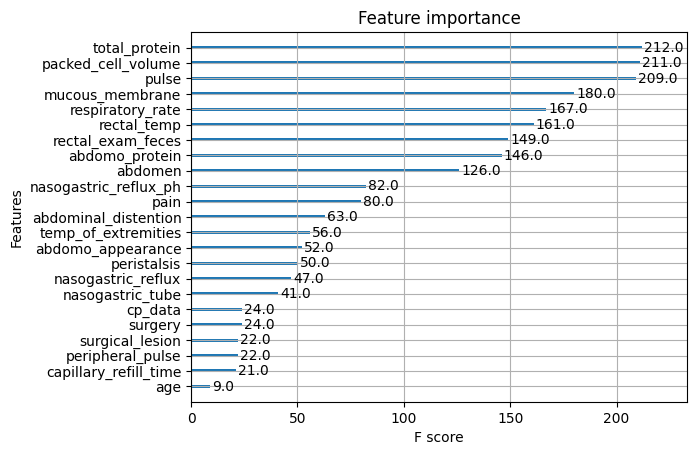

In [366]:
plot_importance(model_xgb)

In [367]:
test_data_2 = test_data_2.drop(columns=['outcome'])
ids = test_data_2.index
y_test_pred_xgb_2 = model_xgb.predict(test_data_2)
df = pd.DataFrame({'id': ids, 'outcome': pd.DataFrame(y_test_pred_xgb_2).replace({0:'lived', 1:'died', 2:'euthanized'})[0]})
df.set_index('id', inplace=True)
print(df)
df.to_csv('results_xgb_4.csv')

         outcome
id              
1235       lived
1236        died
1237       lived
1238  euthanized
1239       lived
...          ...
2054        died
2055  euthanized
2056        died
2057       lived
2058       lived

[824 rows x 1 columns]


Unfortunately, the results were slightly worse and the previous data processing was better. Screens of these to results we submitted to our github.

# **Clusterisation Disscussion**

As the next step of our project, we would like to try find meaningful clusterization for the horses based on their health measurements that would be useful while predicting their outcomes. For example, find what kinds of horses are more likely to die (e.g., horses with some desease and high temperature).

## Extracting main features (PCA)

The data that we work with is high-dimensional (67/8 attributes) which makes the data hard to operate with. For clustering of multidimensional data we need to reduce its dimensionality first by extracting the most important data features. To do this we will firstly use Principal Component Analysis (PCA) and see what happens.


In [368]:
# Imports for this section
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

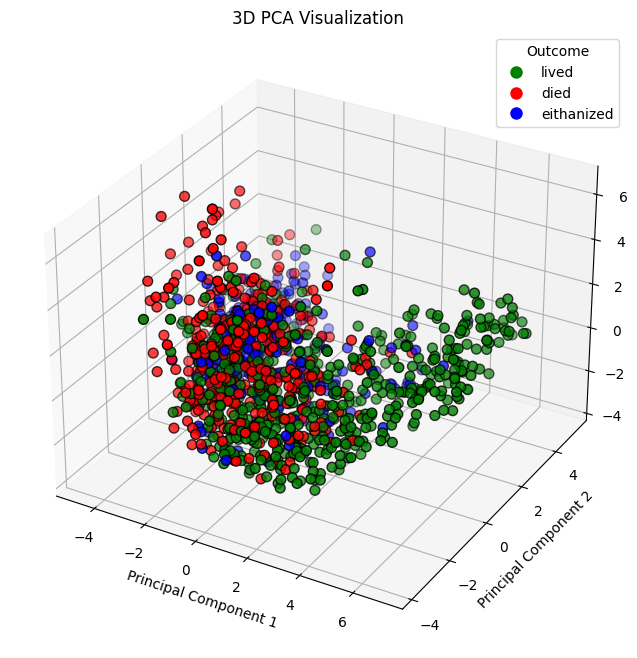

In [369]:
scaler = StandardScaler()
data = train_data.fillna(train_data.mean())
data_scaled = scaler.fit_transform(X_fill_mean)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_scaled)

# Create a DataFrame from the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
color_mapping = {0: 'green', 1: 'red', 2: 'blue'}
color_mapping_str = {'lived': 'green', 'died': 'red', 'eithanized': 'blue'}
colors = list(data['outcome'].map(color_mapping))

# Visualize the PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=colors, s=50, edgecolor='k')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization')

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_mapping_str.items()]
ax.legend(handles=legend_labels, title='Outcome', bbox_to_anchor=(1, 1))

plt.show()

Even though we reduced the dimensionality of data, we can not make any meaningful assumptions about it. Even if we see that instances with values of PC1 > 0 mostly lived, we can not explain why does it happen due to the nature of PC which is a variable that consists of weighted variables from the original dataset (you can see the weights of the variables printed below). That makes the transformed data hard to interpret and clusterize.

In [370]:
principal_components = pca.components_

columns = [f"{train_data.columns[i]}" for i in range(X_mice.shape[1])]
df_components = pd.DataFrame(principal_components, columns=columns, index=['PC1', 'PC2', 'PC3'])

print("Principal Component 1:")
print(df_components.loc['PC1'])

Principal Component 1:
surgery            -0.157088
age                 0.041675
rectal_temp        -0.015952
pulse              -0.238216
respiratory_rate   -0.128715
                      ...   
lesion_1_4          0.020335
lesion_1_5         -0.006704
lesion_1_6          0.000366
lesion_1_7          0.010128
lesion_1_8          0.003838
Name: PC1, Length: 67, dtype: float64


## Clusterisation with DBSCAN

Since we can not make a meaningful clusterisation out of data transformed with PCA that we planned to do in the initial plan, we will try to reduce the size of our dataset and keep those characteristics that can be useful for clustering our horses according to their health status. For example:
- **Fever/Inflammatory Conditions** can be characterized by increased rectal temperature (`rectal_temp`), elevated `pulse`, and potential signs of `pain`.
- **Gastrointestinal Issues**: Abdominal distention (`abdominal_distention`), abnormal `peristalsis`, and changes in nasogastric tube-related features may suggest gastrointestinal problems.
Then we will run PCA for dimensionality reduction and apply DBSCAN for clustering.

In [371]:
respiratory_columns = ['respiratory_rate', 'mucous_membrane_bright_pink', 'mucous_membrane_bright_red',
                       'mucous_membrane_dark_cyanotic', 'mucous_membrane_normal_pink',
                       'mucous_membrane_pale_cyanotic', 'mucous_membrane_pale_pink']

fever_columns = ['rectal_temp', 'pulse', 'pain_alert', 'pain_depressed',
                'pain_extreme_pain', 'pain_mild_pain', 'pain_moderate',
                'pain_severe_pain']

gi_columns = ['abdominal_distention_moderate', 'abdominal_distention_severe',
              'abdominal_distention_slight', 'peristalsis_absent', 'peristalsis_distend_small',
              'peristalsis_hypermotile', 'peristalsis_hypomotile',
              'peristalsis_normal', 'nasogastric_tube_significant',
              'nasogastric_tube_slight']
selected_columns = respiratory_columns + fever_columns + gi_columns
train_data = train_data[selected_columns].copy()

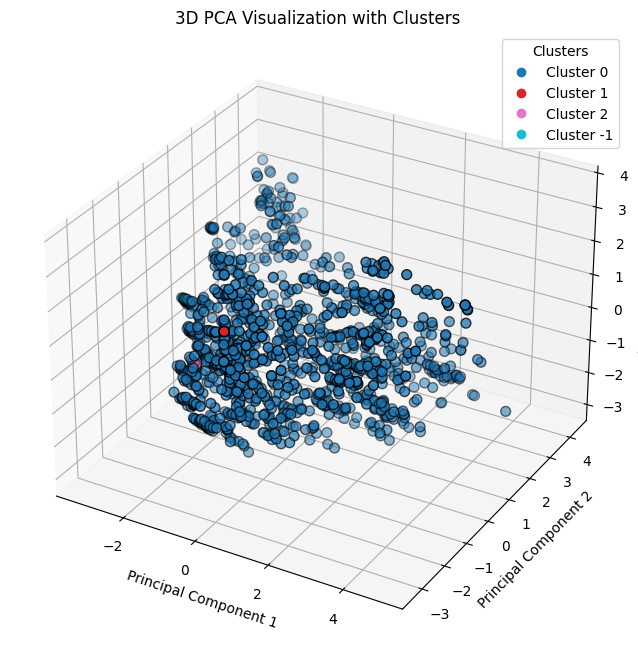

In [372]:
from sklearn.cluster import DBSCAN
from matplotlib.colors import ListedColormap

X_fill_mean = X_fill_mean[selected_columns].copy()
data_scaled = scaler.fit_transform(X_fill_mean)

dbscan = DBSCAN(eps=0.4, min_samples=8)
clusters = dbscan.fit_predict(data_scaled)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

unique_clusters = set(clusters)

cmap = ListedColormap(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=clusters, cmap=cmap, s=50, edgecolor='k')

legend_labels = [f'Cluster {cluster_label}' for cluster_label in unique_clusters]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters', bbox_to_anchor=(1, 1))

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization with Clusters')
plt.show()

Unfortunately, our sample of horses does not allow us to clearly cluster the diseases reported into any groups. Let's take a closer look at what factors are influential for each of the four groups.

In [373]:
X_fill_mean['cluster'] = clusters
# mean values for each feature within each cluster
cluster_means = X_fill_mean.groupby('cluster').mean()
print(cluster_means.T)

cluster                               -1      0          1          2
respiratory_rate               30.219735   36.0  13.777778  15.111111
mucous_membrane_bright_pink     0.072968    0.0   0.000000   0.000000
mucous_membrane_bright_red      0.166667    0.0   1.000000   0.000000
mucous_membrane_dark_cyanotic   0.100332    0.0   0.000000   0.000000
mucous_membrane_normal_pink     0.199834    1.0   0.000000   1.000000
mucous_membrane_pale_cyanotic   0.207297    0.0   0.000000   0.000000
mucous_membrane_pale_pink       0.235489    0.0   0.000000   0.000000
rectal_temp                    38.185821   40.3  38.077778  38.477778
pulse                          79.688226  114.0  64.888889  48.888889
pain_alert                      0.071310    0.0   0.000000   0.000000
pain_depressed                  0.348259    1.0   0.000000   0.000000
pain_extreme_pain               0.099502    0.0   0.000000   0.000000
pain_mild_pain                  0.323383    0.0   1.000000   1.000000
pain_moderate       

At the end we managed to get 4 classes, where two of them(-1, 0), according to our interpretation, may indicate respiratory infections and fever respectively. As elevated respiratory rate(30 while normally it is between 6 and 10) and changed abnormal mucous membrane color may suggest respiratory infections. While fever is accompanied by increased rectal temperature(mean=40.3), elevated pulse(114), and potential signs of pain(depressed).


### Inflammable processes

We would also like to check whether we can follow up on the inflammable processes among horses. The possible indicators of inflammable processes in the organism are high temperature, elevated pulse, and pain.

We would like to visualise those indicators and see whether there is a relation between all of these factors and horses' outcomes. Those indicators from the dataset will be `rectal_temp`, `pulse`, and `pain` attribute that is an ordinal attribute that contains levels of pain.

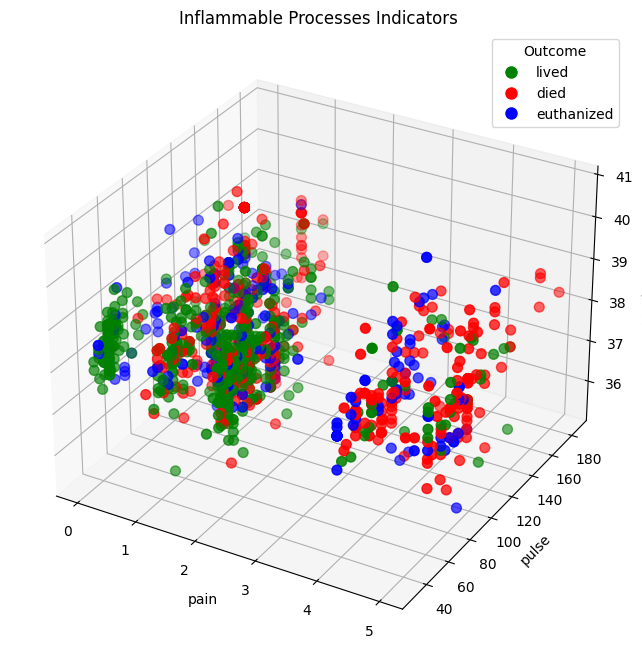

In [374]:
plot_points = data[['rectal_temp', 'pulse', 'outcome']].copy()

conditions = [
    (data['pain_severe_pain'] == 1),
    (data['pain_extreme_pain'] == 1),
    (data['pain_moderate'] == 1),
    (data['pain_mild_pain'] == 1),
    (data['pain_depressed'] == 1),
    (data['pain_alert'] == 1),
    # Add more conditions as needed
]

values = [4, 5, 3, 2, 1, 0]  # Assign values based on the severity of pain

# Create a new column 'overall_pain' based on conditions
plot_points['pain'] = np.select(conditions, values, default=0)

# color_mapping = {0: 'green', 1: 'red', 2: 'blue'}
color_mapping = {0: 'green', 1: 'red', 2: 'blue'}
color_mapping_str = {'lived': 'green', 'died': 'red', 'euthanized': 'blue'}
plot_points['color'] = plot_points['outcome'].map(color_mapping)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(plot_points['pain'], plot_points['pulse'], plot_points['rectal_temp'], c=plot_points['color'], s=50)
ax.set_xlabel('pain')
ax.set_ylabel('pulse')
ax.set_zlabel('rectal_temp')
ax.set_title('Inflammable Processes Indicators')

# Create a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_mapping_str.items()]
ax.legend(handles=legend_labels, title='Outcome', bbox_to_anchor=(1, 1))

plt.show()

We wanted to check whether there is any visual correlation between indicators of inflammable processes among horses and their outcome. From the results, though, the correlation between high temperature (the primary indicator of inflammable processes in an organism) and the lethal effect is quite vague compared to the visual correlation with pain increase.

Thus, we didn't get the expected result to help us see the difference between horses with inflammable processes in organisms and those without. Still, we did get a graph that may represent a positive relation between the rise in pain and lethality.

### Gastrointestinal Issues

For checking horses with gastrointestinal issues we will use `nasogastric_tube_significant` attribute to represent the nasogastric tube appearance where 1 means that the nasogastric tube gas is significant and 0 that it is not. We will also create two new ordinal attributes `peristalis` and abdominal_distention that also could be identificators of gastric issues.

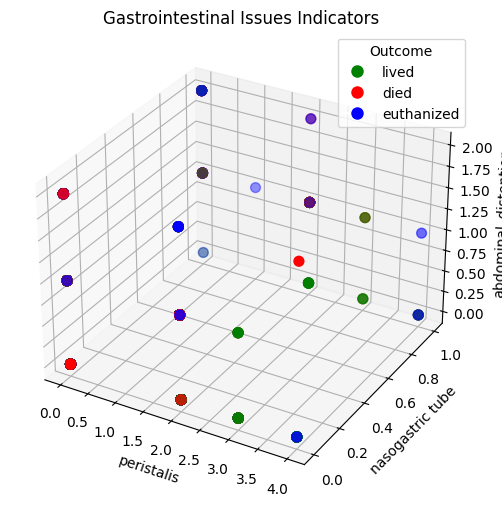

In [375]:
plot_points = data[['nasogastric_tube_significant', 'outcome']].copy()

conditions = [
    (data['peristalsis_absent'] == 1),
    (data['peristalsis_distend_small'] == 1),
    (data['peristalsis_hypomotile'] == 1),
    (data['peristalsis_hypermotile'] == 1),
    (data['peristalsis_normal'] == 1)
]

values = [0, 1, 2, 3, 4]  # Assign values based on the severity of pain

# Create a new column 'overall_pain' based on conditions
plot_points['peristalis'] = np.select(conditions, values, default=0)

conditions = [
    (data['abdominal_distention_moderate'] == 1),
    (data['abdominal_distention_severe'] == 1),
    (data['abdominal_distention_slight'] == 1)
]
values = [1, 2, 0]
plot_points['abdominal_distention'] = np.select(conditions, values, default=0)

color_mapping = {0: 'green', 1: 'red', 2: 'blue'}
color_mapping_str = {'lived': 'green', 'died': 'red', 'euthanized': 'blue'}
plot_points['color'] = plot_points['outcome'].map(color_mapping)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(plot_points['peristalis'], plot_points['nasogastric_tube_significant'], \
           plot_points['abdominal_distention'], c=plot_points['color'], s=50)
ax.set_xlabel('peristalis')
ax.set_ylabel('nasogastric tube')
ax.set_zlabel('abdominal_distention')
ax.set_title('Gastrointestinal Issues Indicators')

# Create a legend
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in color_mapping_str.items()]
ax.legend(handles=legend_labels, title='Outcome', bbox_to_anchor=(1, 1))

plt.show()

All of the attributes used for data representation were cathegorical we got s few points that are easier to interpret than those in the previous ones since the points here are intersections of many points. Thus, we can see that in some points all or most of the horses lived/died/were euthanised, what may be useful to predict the horse's possible outcome based only on these three values with critical values. For example, using this plot insurance company can say that they won't give insurance to a horse with slight nasogastric tube, absent peristalsis, and moderate abdominal distention without deeper investigation.